In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import pearsonr, spearmanr

In [ ]:
def write_to_csv(filename, data):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["diseaseId", "pval"])
        writer.writeheader()
        writer.writerows(data)

In [2]:
filename = 'data/final_enr.csv'
columns = ['diseaseId', 'pval_tad', 'pval_border', 'pval_outside', 'is_cancer', 'window_size', 'filter']
df = pd.read_csv(filename, usecols=columns)
print(df.head)

<bound method NDFrame.head of              diseaseId  pval_tad  pval_border  pval_outside  is_cancer  \
0          EFO_0000094  0.000000     0.000000      1.000000      False   
1          EFO_0000095  0.000000     0.000000      1.000000      False   
2          EFO_0000096  0.000000     0.000000      1.000000      False   
3          EFO_0000174  0.000000     0.000000      1.000000       True   
4          EFO_0000178  0.000000     0.000000      1.000000       True   
...                ...       ...          ...           ...        ...   
76169    Orphanet_1945       NaN          NaN           NaN      False   
76170  Orphanet_391311  0.948806     0.167580      1.000000      False   
76171     Orphanet_654  0.962639     0.091789      0.912473       True   
76172   Orphanet_93957       NaN          NaN           NaN      False   
76173   Orphanet_98974  0.722880     0.293352      1.000000      False   

       window_size     filter  
0                0   nofilter  
1                

In [18]:
df.head

<bound method NDFrame.head of              diseaseId  pval_tad  pval_border  pval_outside  is_cancer  \
0          EFO_0000094  0.000000     0.000000      1.000000      False   
1          EFO_0000095  0.000000     0.000000      1.000000      False   
2          EFO_0000096  0.000000     0.000000      1.000000      False   
3          EFO_0000174  0.000000     0.000000      1.000000       True   
4          EFO_0000178  0.000000     0.000000      1.000000       True   
...                ...       ...          ...           ...        ...   
76169    Orphanet_1945       NaN          NaN           NaN      False   
76170  Orphanet_391311  0.948806     0.167580      1.000000      False   
76171     Orphanet_654  0.962639     0.091789      0.912473       True   
76172   Orphanet_93957       NaN          NaN           NaN      False   
76173   Orphanet_98974  0.722880     0.293352      1.000000      False   

       window_size     filter  
0                0   nofilter  
1                

In [35]:
df_cancers = pd.read_csv("data/cancerous_output.csv", usecols=['efoID', 'z_score', 'pvalue'])
df_cancers = df_cancers.rename(columns={'efoID': 'diseaseId'})
#df_cancers['is_cancer'] = True
df_cancers.shape
print(df_cancers.head)

<bound method NDFrame.head of         diseaseId    z_score        pvalue
0     EFO_0001071   2.193173  4.320000e-02
1     EFO_0000707   8.924191  3.840000e-05
2     EFO_0000571   7.287945  4.570000e-05
3   MONDO_0005575   2.359995  9.560000e-07
4     EFO_0005512  -0.120418  4.313000e-01
5     EFO_0000222   2.164232  8.800000e-03
6     EFO_0000708   8.554791  5.750000e-06
7     EFO_0002618   3.859886  3.000000e-03
8     EFO_1001252   2.060168  0.000000e+00
9     EFO_0004587  10.506128  0.000000e+00
10    EFO_0001075   1.743658  1.409000e-01
11    EFO_0007993   6.926885  1.120000e-11
12    EFO_0004193   6.171672  3.100000e-06
13    EFO_0006953   1.364171  9.090000e-11
14    EFO_0010176  10.154472  2.810000e-05
15    EFO_0000389  19.109489  1.470000e-14
16    EFO_0009260   3.449939  2.400000e-03
17    EFO_1001927  13.062782  9.600000e-09
18    EFO_0009781  -0.077243  4.313000e-01
19    EFO_0000174  -0.421883  3.851000e-01
20    EFO_0005221   2.322111  0.000000e+00
21    EFO_0006900   1.50

In [36]:
df_noncancers = pd.read_csv("data/noncancerous_output.csv", usecols=['efoID', 'z_score', 'pvalue'])
df_noncancers = df_noncancers.rename(columns={'efoID': 'diseaseId'})
#df_noncancers["is_cancer"] = False
print(df_noncancers.head)

<bound method NDFrame.head of          diseaseId    z_score        pvalue
0      EFO_0000274   6.115688  2.770000e-06
1      EFO_0004314   2.858420  5.450000e-05
2      EFO_0003884   1.503545  5.380000e-02
3      EFO_0003758  32.549729  1.390000e-14
4      EFO_0000729  13.803174  0.000000e+00
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[231 rows x 3 columns]>


In [23]:
df.columns

Index(['diseaseId', 'pval_tad', 'pval_border', 'pval_outside', 'is_cancer',
       'window_size', 'filter'],
      dtype='object')

In [37]:
def get_scatterplot(df1, window, filter, df2, type):
    df_1 = df1[df1['window_size'] == window]
    df_1 = df_1[df_1['filter'] == filter]
    combined_data = pd.merge(df_1, df2, on='diseaseId', how='inner', indicator=True)
    combined_data['pval_border'] = combined_data['pval_border'].replace(0, 1e-8)
    
    df1_excluded = df_1[~df_1['diseaseId'].isin(combined_data['diseaseId'])]
    df2_excluded = df2[~df2['diseaseId'].isin(combined_data['diseaseId'])]

    print("\nRows from PPI Network dataset that were NOT included:")
    print(df2_excluded, f'length: {len(df2_excluded)}')
    
    print(f'number of null points: {combined_data.isnull().sum()}') 
    print(combined_data[['pval_border', 'z_score']].describe())
    combined_data = combined_data.dropna(subset=['pval_border', 'z_score'])
    
    sns.scatterplot(data=combined_data, x='pval_border', y='z_score', hue='is_cancer', palette={True: 'red', False: 'blue'}, alpha=0.5, s=30)
    plt.axvline(x=0.05, color='black', linestyle='dashed', label='P = 0.05')
    plt.xscale('log')
    plt.gca().invert_xaxis()
    plt.xlabel(f'TAD Border -log10(P-value). window: {window}, filter: {filter}')
    plt.ylabel('Z Score')
    cancer_data = combined_data[combined_data['is_cancer'] == True]
    noncancer_data = combined_data[combined_data['is_cancer'] == False]
    legend_items = [
        patches.Patch(color='red', label=f'True {len(cancer_data)}'), 
        patches.Patch(color='blue', label=f'False {len(noncancer_data)}')]
    plt.legend(title='Is Cancer', handles=legend_items, loc='upper right', framealpha = 0.5)
    plt.title(f'Comparison of PPI Z score to TAD border P value. {len(combined_data)} points')

    
    if len(combined_data) >= 2:
        if len(cancer_data) >= 2 and len(noncancer_data) >= 2:
            stats = {
                "Combined Pearson": pearsonr(combined_data["pval_border"], combined_data["z_score"]),
                "Combined Spearman": spearmanr(combined_data["pval_border"], combined_data["z_score"]),
                "Cancer Pearson": pearsonr(cancer_data["pval_border"], cancer_data["z_score"]), 
                "Cancer Spearman": spearmanr(cancer_data["pval_border"], cancer_data["z_score"]),
                "Noncancer Pearson": pearsonr(noncancer_data["pval_border"], noncancer_data["z_score"]), 
                "Noncancer Spearman": spearmanr(noncancer_data["pval_border"], noncancer_data["z_score"])
            }
        else:
            stats = {
                "Combined Pearson": pearsonr(combined_data["pval_border"], combined_data["z_score"]),
                "Combined Spearman": spearmanr(combined_data["pval_border"], combined_data["z_score"])
            }
            
        table_data = [
            ["Metric", "r", "p"]
        ]
        
        for key, value in stats.items():
            table_data.append([key, f"{value[0]:.5f}", f"{value[1]:.5f}"])

        table = plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='bottom', bbox=[0, -0.5, 1, 0.3])
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.scale(1, 1.2)
        
        

    plt.savefig(f'results_graphs/{type}/comparison_{type}_{window}_{filter}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [38]:
combined = pd.concat([df_cancers, df_noncancers])

In [39]:
combined.head

<bound method NDFrame.head of          diseaseId   z_score        pvalue
0      EFO_0001071  2.193173  4.320000e-02
1      EFO_0000707  8.924191  3.840000e-05
2      EFO_0000571  7.287945  4.570000e-05
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[260 rows x 3 columns]>


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        22
pval_border     22
pval_outside    22
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.570000e+02  179.000000
mean   1.417449e-01    6.667049
std    2.027301e-01    9.793396
min    1.923526e-14   -0.4690

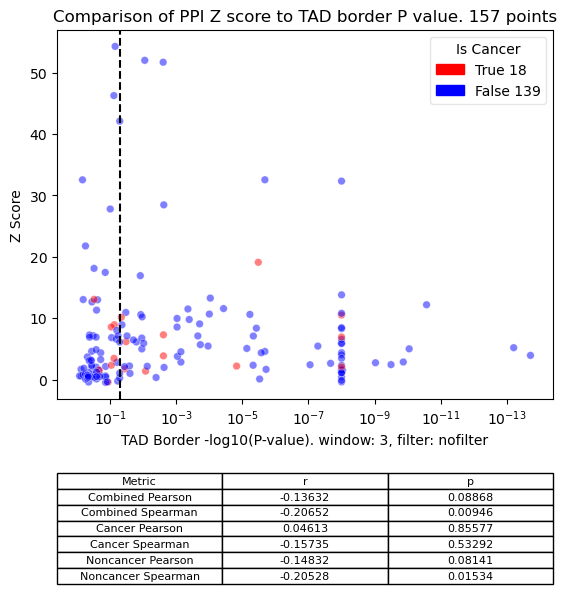


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        17
pval_border     17
pval_outside    17
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.120000e+02  129.000000
mean   8.046918e-02    8.228020
std    1.428541e-01   10.057576
min    9.992007e-16   -0.254518
25%    

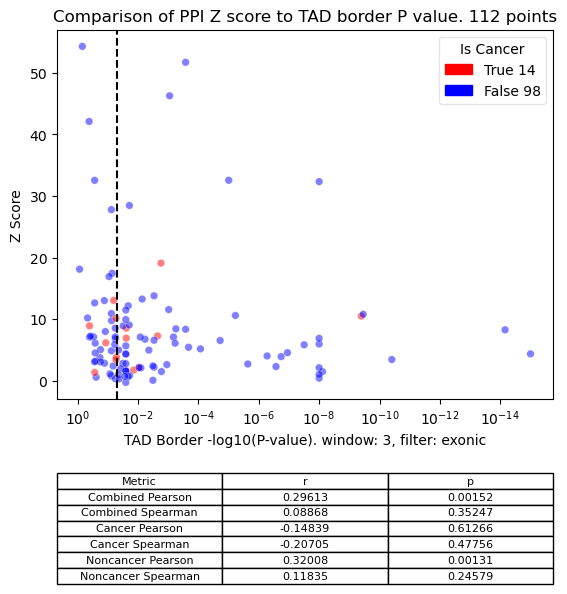


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        25
pval_border     25
pval_outside    25
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.460000e+02  171.000000
mean   1.000177e-01    6.752572
std    1.605695e-01    9.754975
min    1.472156e-15   -0.4690

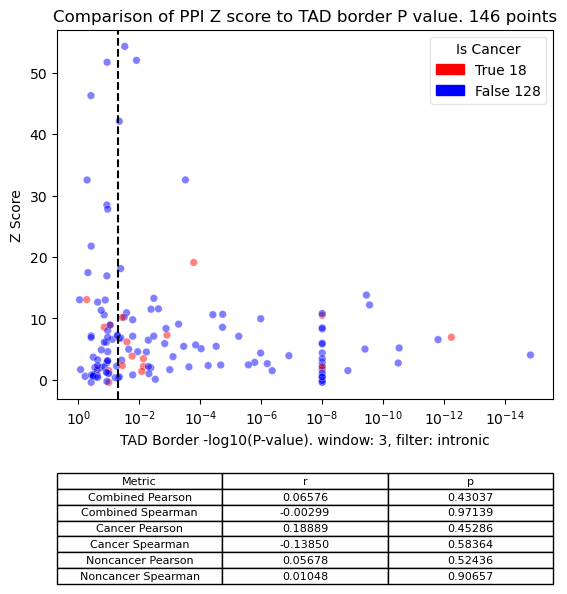


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        19
pval_border     19
pval_outside    19
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.330000e+02  152.000000
mean   3.420554e-01    6.980600
std    3.029668e-01    9.759849
min    2.326520e-13   -0.469036
25%    

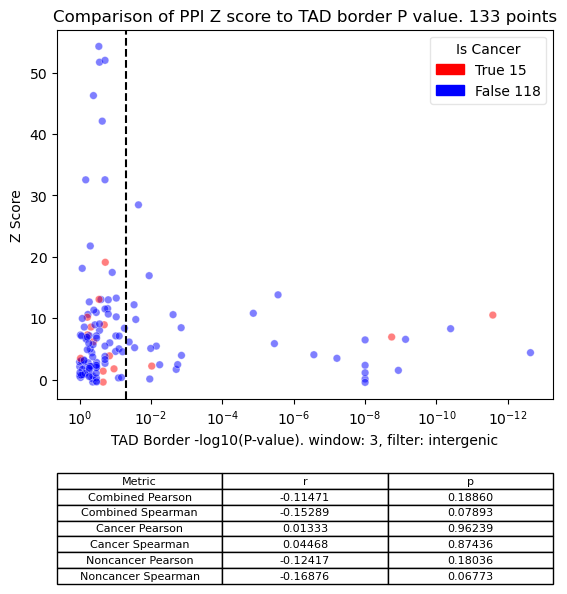


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        23
pval_border     23
pval_outside    23
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.540000e+02  177.000000
mean   1.608831e-01    6.556763
std    2.166872e-01    9.645065
min    1.916456e-15   -0.4690

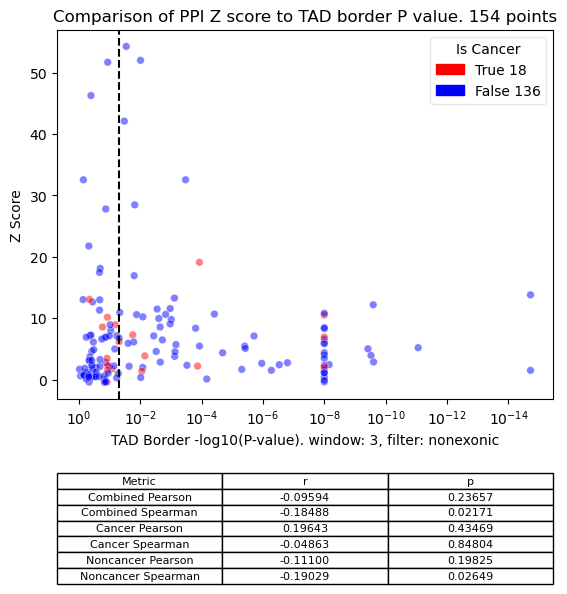


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        22
pval_border     22
pval_outside    22
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.570000e+02  179.000000
mean   1.533099e-01    6.667049
std    2.251500e-01    9.793396
min    3.548088e-15   -0.4690

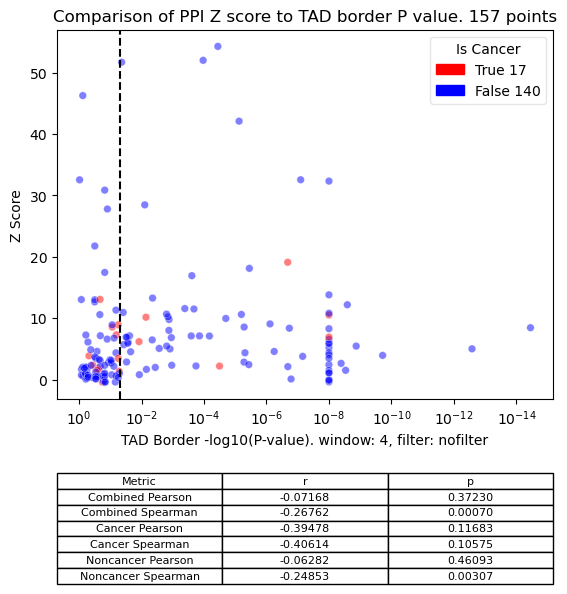


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        12
pval_border     12
pval_outside    12
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.170000e+02  129.000000
mean   9.315643e-02    8.228020
std    1.395133e-01   10.057576
min    1.468205e-13   -0.254518
25%    

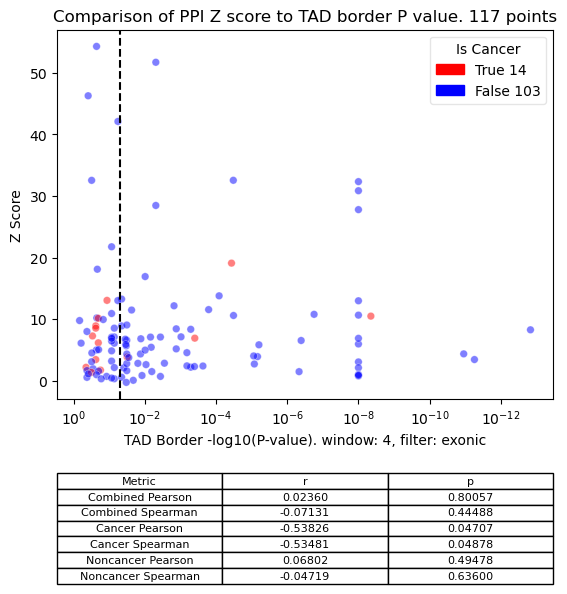


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        28
pval_border     28
pval_outside    28
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.430000e+02  171.000000
mean   1.162741e-01    6.752572
std    1.872953e-01    9.754975
min    2.397007e-13   -0.4690

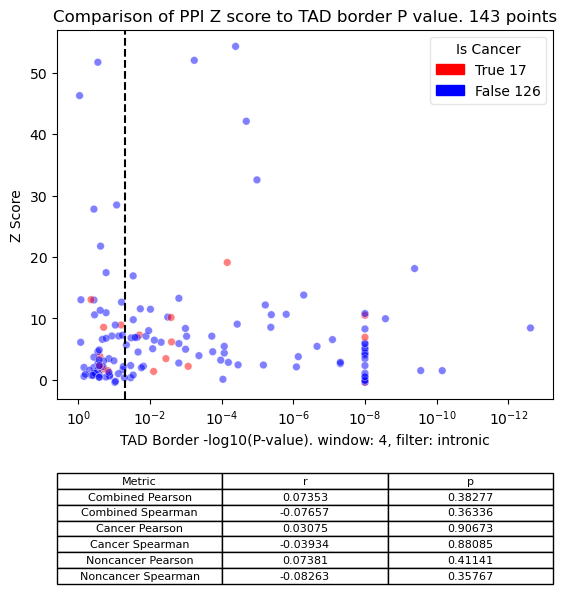


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        16
pval_border     16
pval_outside    16
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.360000e+02  152.000000
mean   3.139383e-01    6.980600
std    2.977907e-01    9.759849
min    1.325606e-14   -0.469036
25%    

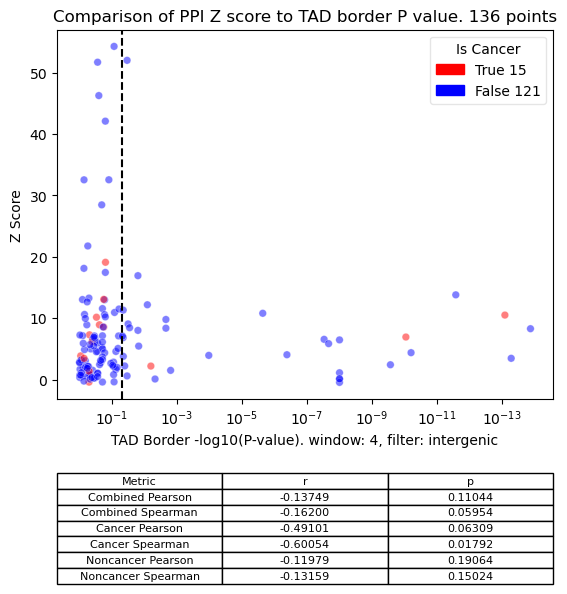


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        22
pval_border     22
pval_outside    22
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.550000e+02  177.000000
mean   1.778087e-01    6.556763
std    2.447162e-01    9.645065
min    1.459702e-14   -0.4690

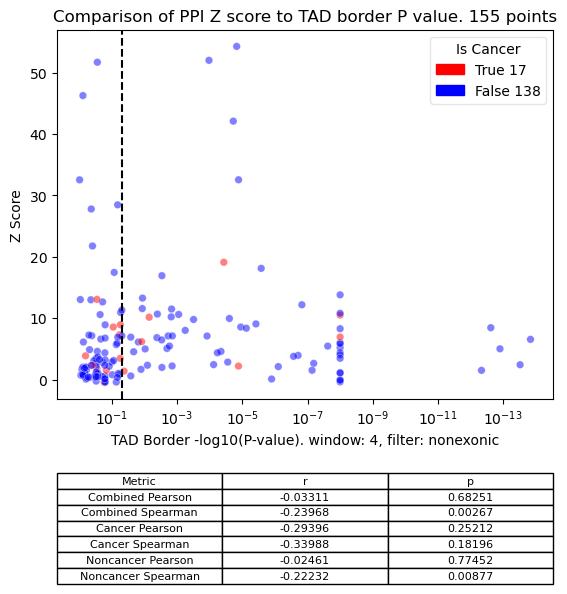


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        25
pval_border     25
pval_outside    25
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.540000e+02  179.000000
mean   1.727425e-01    6.667049
std    2.351082e-01    9.793396
min    3.903854e-15   -0.4690

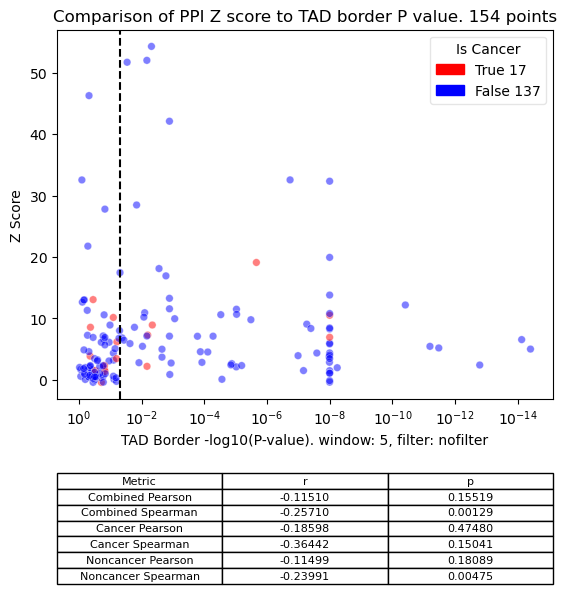


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        11
pval_border     11
pval_outside    11
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.180000e+02  129.000000
mean   8.775672e-02    8.228020
std    1.482125e-01   10.057576
min    2.029554e-10   -0.254518
25%    

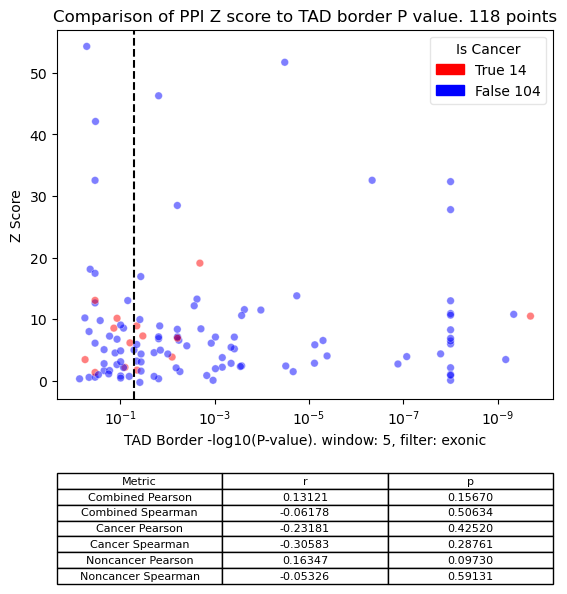


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        26
pval_border     26
pval_outside    26
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.450000e+02  171.000000
mean   1.387575e-01    6.752572
std    2.134170e-01    9.754975
min    1.137552e-14   -0.4690

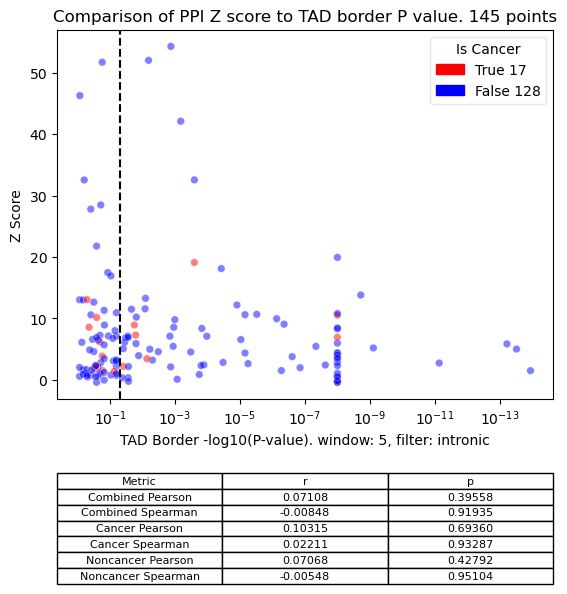


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        18
pval_border     18
pval_outside    18
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.340000e+02  152.000000
mean   3.724992e-01    6.980600
std    3.127068e-01    9.759849
min    2.651213e-14   -0.469036
25%    

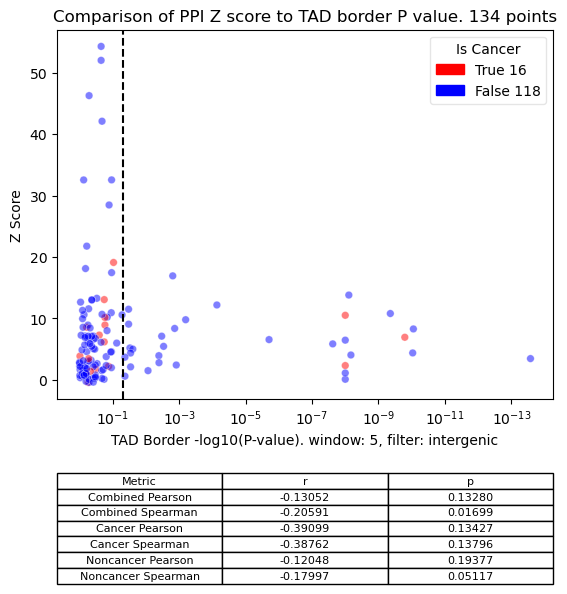


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        24
pval_border     24
pval_outside    24
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.530000e+02  177.000000
mean   2.102683e-01    6.556763
std    2.644107e-01    9.645065
min    2.006525e-15   -0.4690

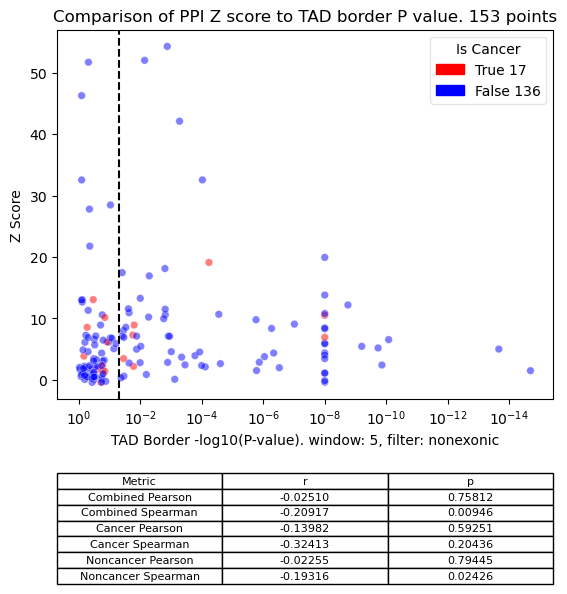


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        23
pval_border     23
pval_outside    23
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.560000e+02  179.000000
mean   1.612778e-01    6.667049
std    2.381803e-01    9.793396
min    4.543467e-14   -0.4690

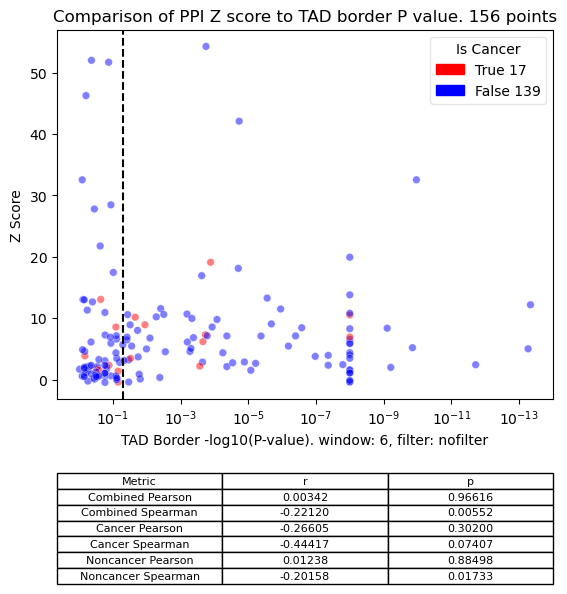


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        14
pval_border     14
pval_outside    14
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.150000e+02  129.000000
mean   8.717600e-02    8.228020
std    1.363487e-01   10.057576
min    1.694597e-13   -0.254518
25%    

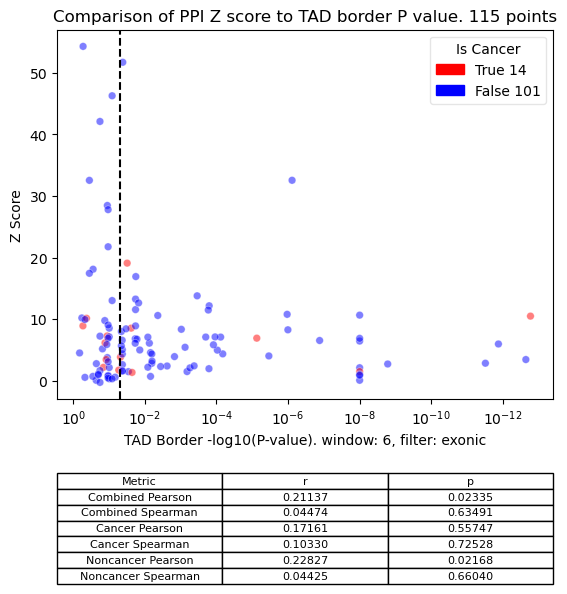


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        24
pval_border     24
pval_outside    24
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.470000e+02  171.000000
mean   1.336680e-01    6.752572
std    2.146684e-01    9.754975
min    2.721056e-15   -0.4690

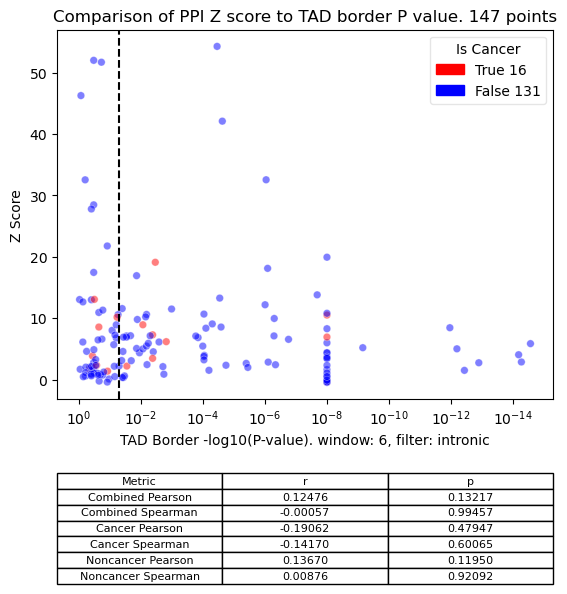


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        15
pval_border     15
pval_outside    15
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.370000e+02  152.000000
mean   3.272329e-01    6.980600
std    3.223636e-01    9.759849
min    5.162537e-14   -0.469036
25%    

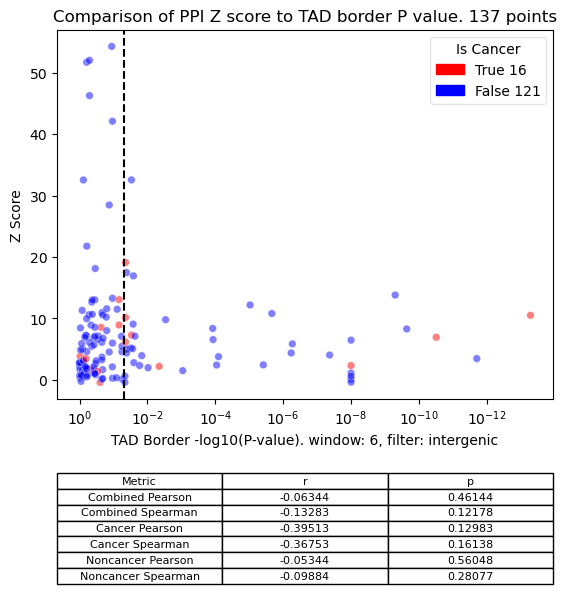


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        22
pval_border     22
pval_outside    22
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.550000e+02  177.000000
mean   1.869636e-01    6.556763
std    2.618619e-01    9.645065
min    1.748011e-15   -0.4690

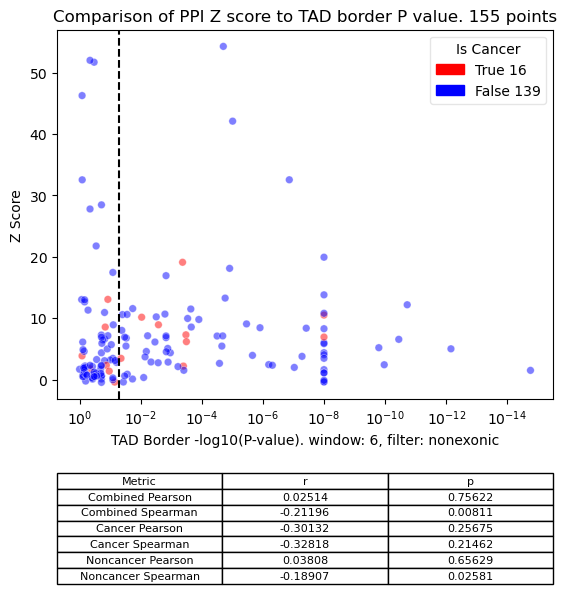


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        21
pval_border     21
pval_outside    21
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.580000e+02  179.000000
mean   1.742665e-01    6.667049
std    2.362489e-01    9.793396
min    1.746288e-15   -0.4690

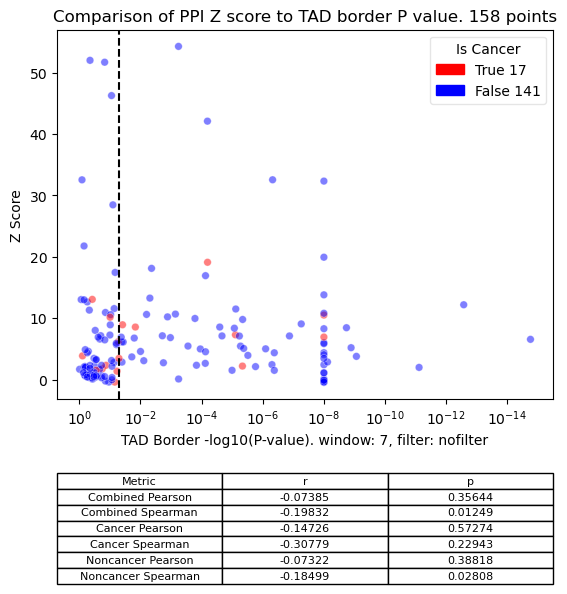


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        11
pval_border     11
pval_outside    11
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.180000e+02  129.000000
mean   9.165328e-02    8.228020
std    1.324544e-01   10.057576
min    3.275552e-16   -0.254518
25%    

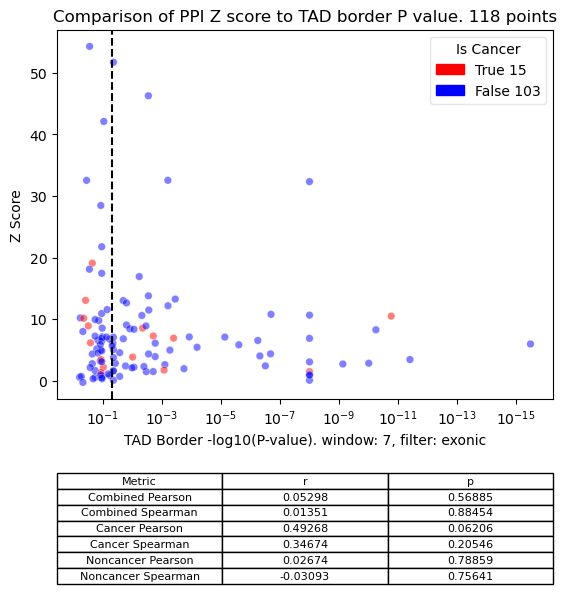


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        24
pval_border     24
pval_outside    24
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.470000e+02  171.000000
mean   1.494323e-01    6.752572
std    2.229913e-01    9.754975
min    3.545939e-14   -0.4690

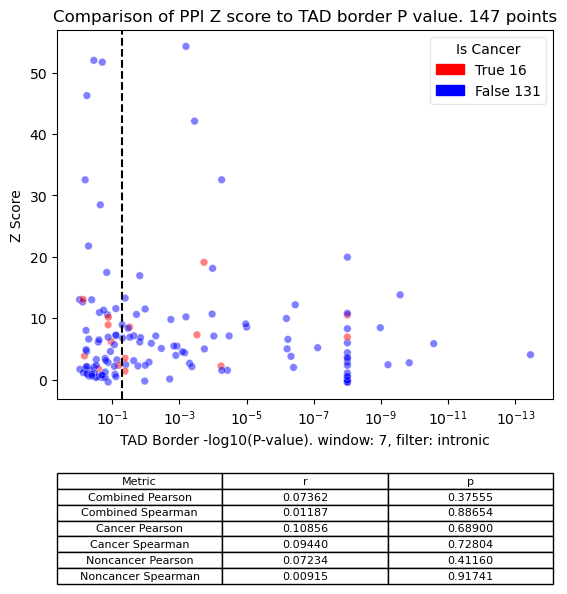


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        14
pval_border     14
pval_outside    14
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.380000e+02  152.000000
mean   3.251311e-01    6.980600
std    3.066251e-01    9.759849
min    7.453419e-12   -0.469036
25%    

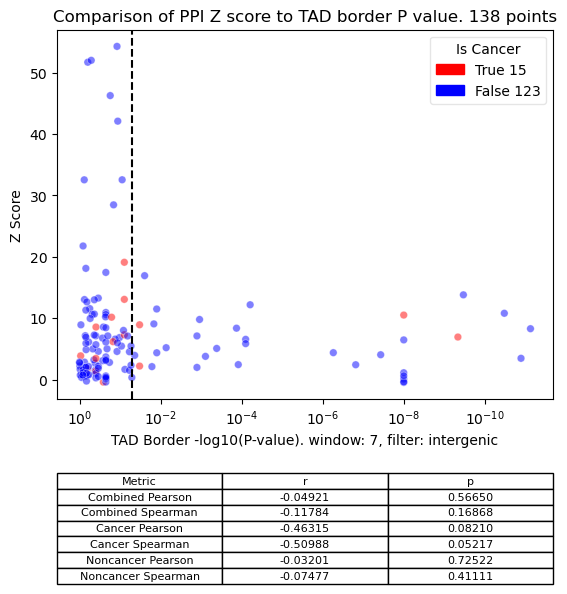


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        22
pval_border     22
pval_outside    22
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.550000e+02  177.000000
mean   1.989670e-01    6.556763
std    2.568846e-01    9.645065
min    1.575663e-15   -0.4690

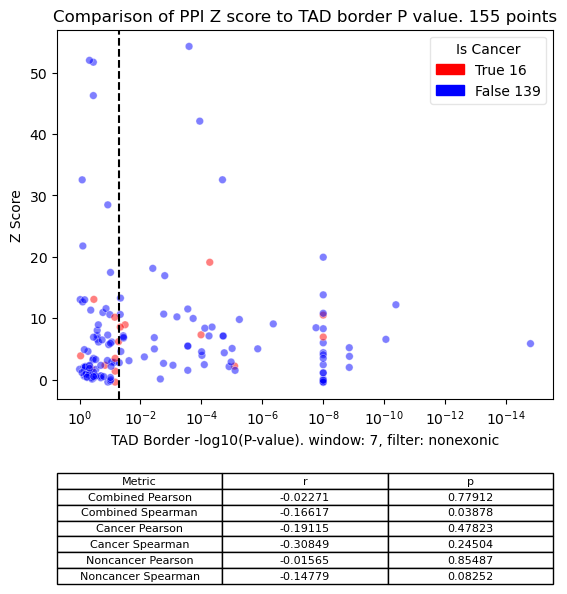


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        22
pval_border     22
pval_outside    22
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.570000e+02  179.000000
mean   1.737586e-01    6.667049
std    2.430107e-01    9.793396
min    6.878851e-15   -0.4690

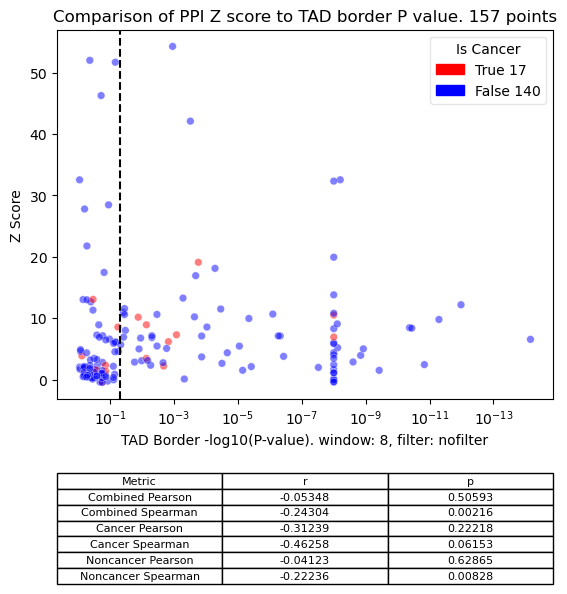


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        10
pval_border     10
pval_outside    10
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.190000e+02  129.000000
mean   9.072983e-02    8.228020
std    1.357019e-01   10.057576
min    1.627998e-14   -0.254518
25%    

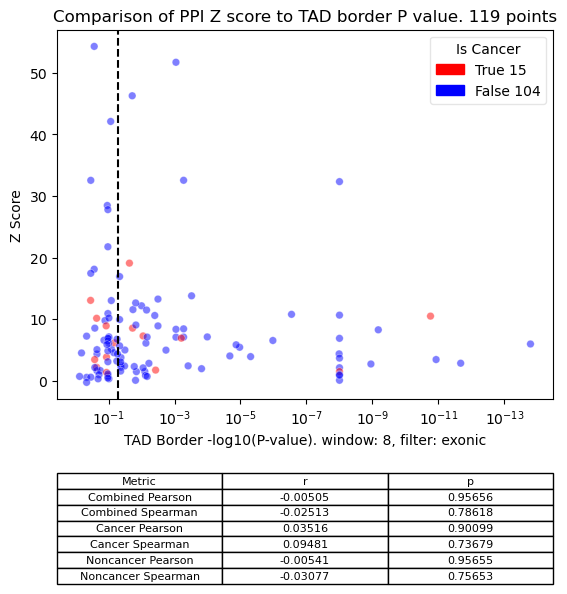


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        27
pval_border     27
pval_outside    27
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.440000e+02  171.000000
mean   1.553205e-01    6.752572
std    2.310233e-01    9.754975
min    5.805780e-13   -0.4690

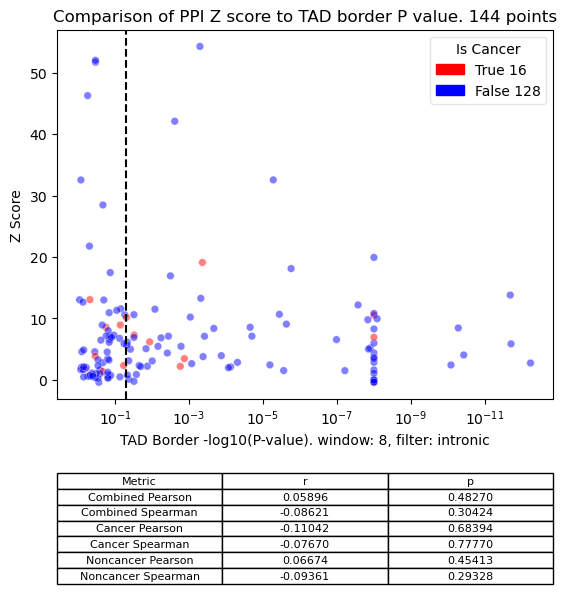


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        13
pval_border     13
pval_outside    13
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.390000e+02  152.000000
mean   3.037030e-01    6.980600
std    3.000231e-01    9.759849
min    5.337778e-15   -0.469036
25%    

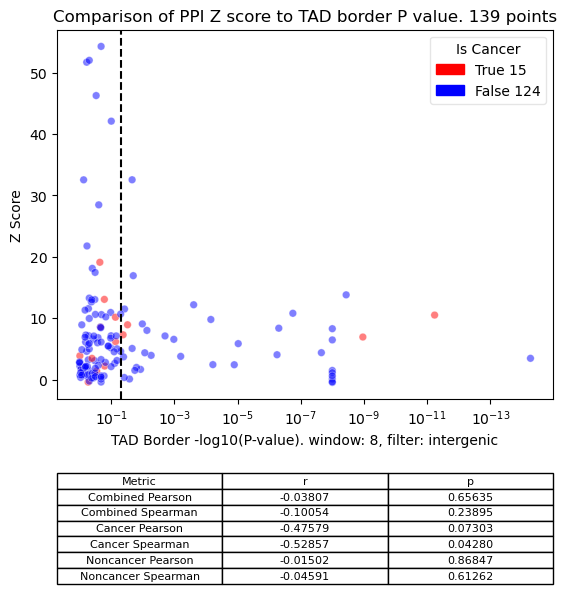


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        24
pval_border     24
pval_outside    24
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.530000e+02  177.000000
mean   1.929131e-01    6.556763
std    2.622239e-01    9.645065
min    3.234885e-15   -0.4690

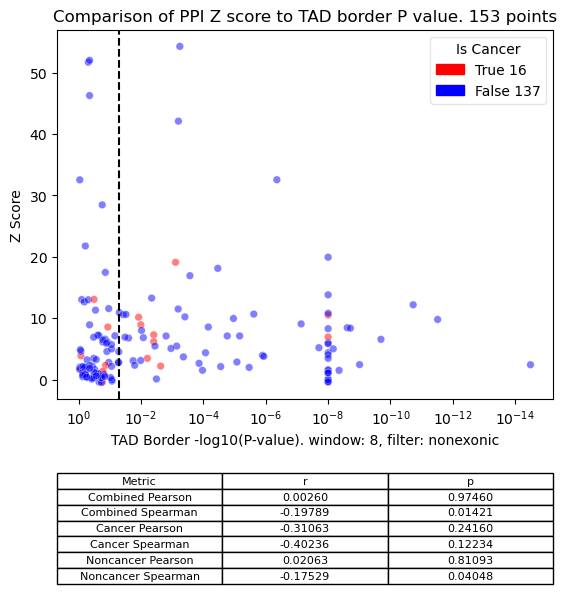


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        27
pval_border     27
pval_outside    27
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.520000e+02  179.000000
mean   1.682594e-01    6.667049
std    2.388037e-01    9.793396
min    2.209117e-14   -0.4690

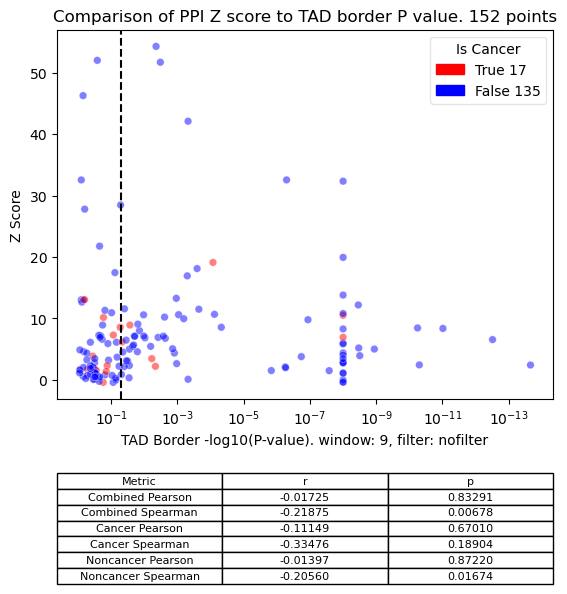


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        14
pval_border     14
pval_outside    14
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.150000e+02  129.000000
mean   8.180860e-02    8.228020
std    1.188947e-01   10.057576
min    1.624518e-15   -0.254518
25%    

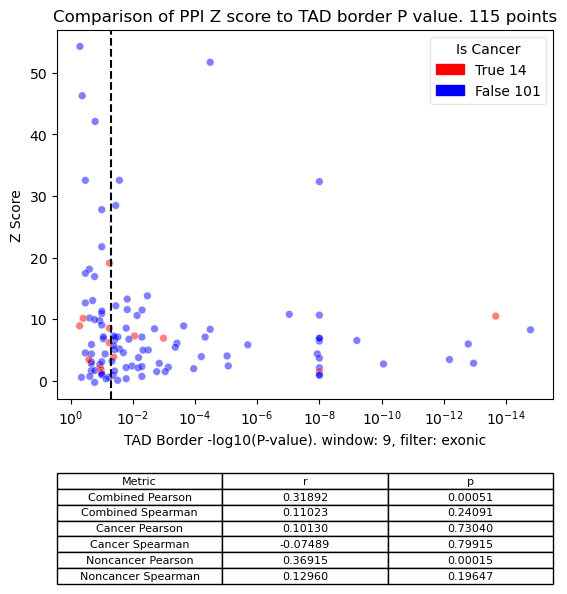


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        32
pval_border     32
pval_outside    32
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.390000e+02  171.000000
mean   1.480369e-01    6.752572
std    2.248351e-01    9.754975
min    1.531183e-15   -0.4690

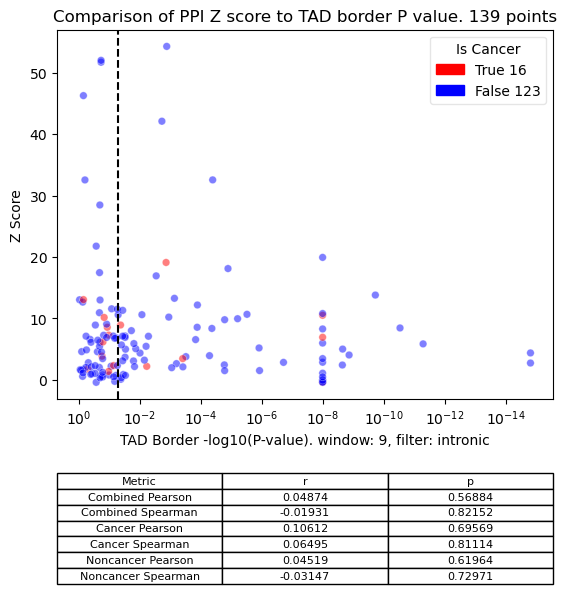


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        17
pval_border     17
pval_outside    17
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.350000e+02  152.000000
mean   3.128645e-01    6.980600
std    2.889619e-01    9.759849
min    1.839427e-14   -0.469036
25%    

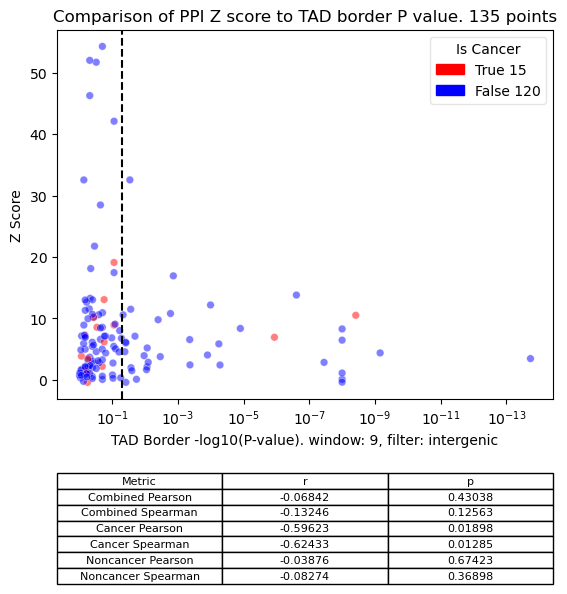


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        29
pval_border     29
pval_outside    29
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.480000e+02  177.000000
mean   1.868800e-01    6.556763
std    2.440943e-01    9.645065
min    1.769116e-14   -0.4690

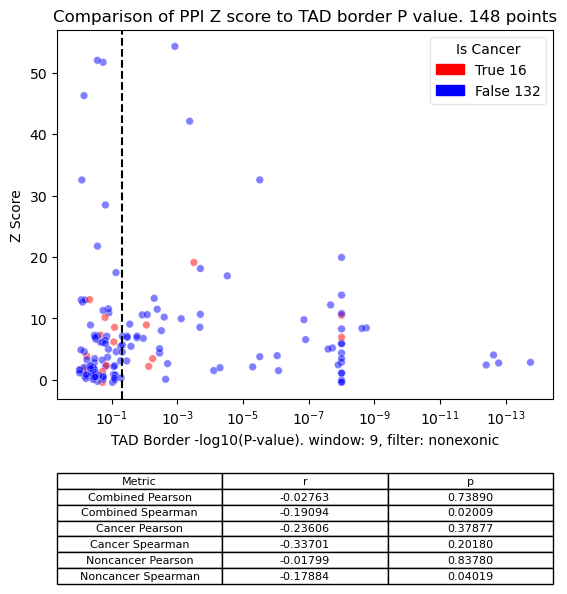


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        29
pval_border     29
pval_outside    29
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.500000e+02  179.000000
mean   1.827315e-01    6.667049
std    2.484278e-01    9.793396
min    6.603245e-13   -0.4690

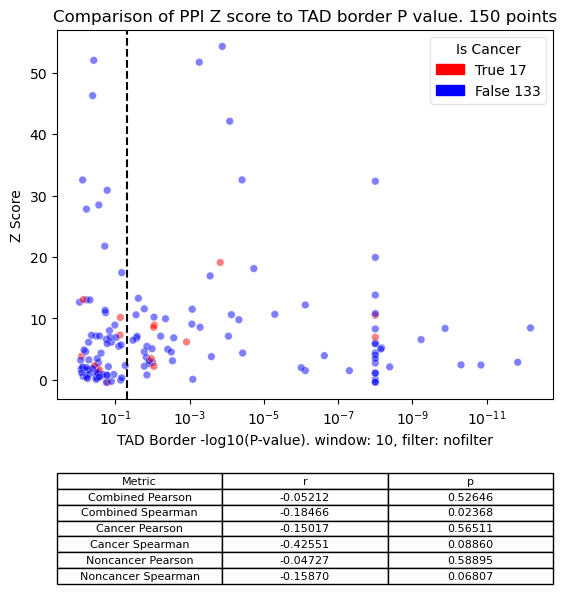


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        12
pval_border     12
pval_outside    12
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.170000e+02  129.000000
mean   7.510305e-02    8.228020
std    1.036875e-01   10.057576
min    1.975181e-14   -0.254518
25%    

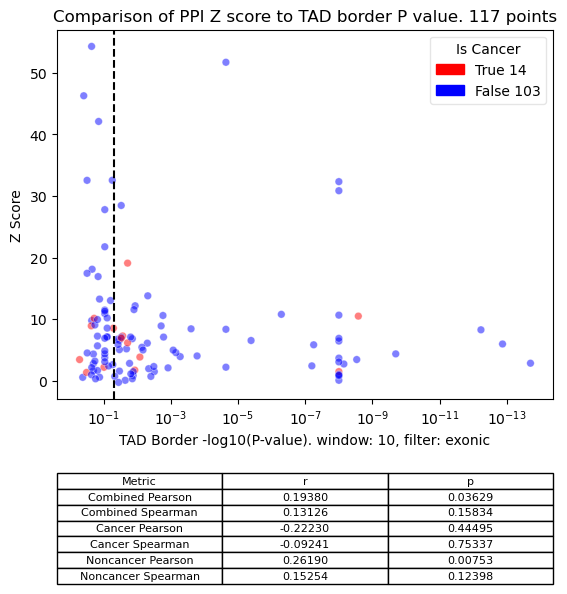


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        33
pval_border     33
pval_outside    33
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.380000e+02  171.000000
mean   1.638433e-01    6.752572
std    2.340305e-01    9.754975
min    9.375217e-16   -0.4690

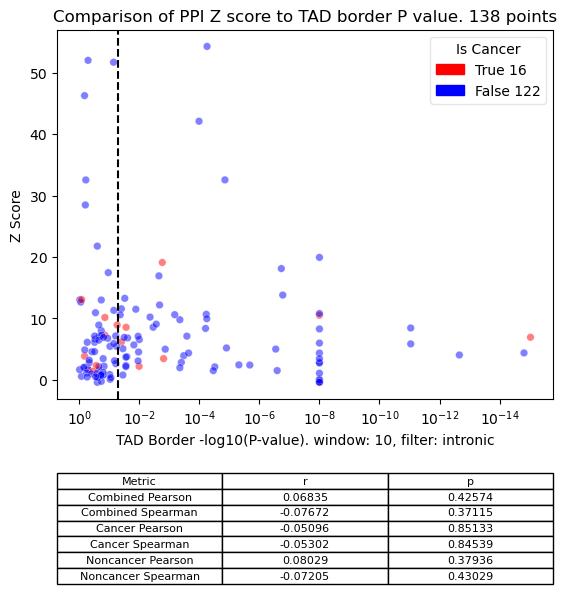


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        18
pval_border     18
pval_outside    18
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.340000e+02  152.000000
mean   3.205089e-01    6.980600
std    2.965443e-01    9.759849
min    6.217249e-15   -0.469036
25%    

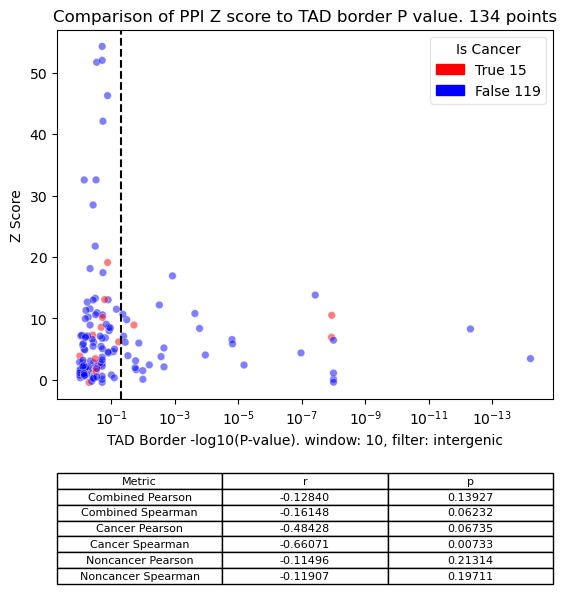


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        31
pval_border     31
pval_outside    31
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.460000e+02  177.000000
mean   2.074118e-01    6.556763
std    2.598425e-01    9.645065
min    1.317551e-14   -0.4690

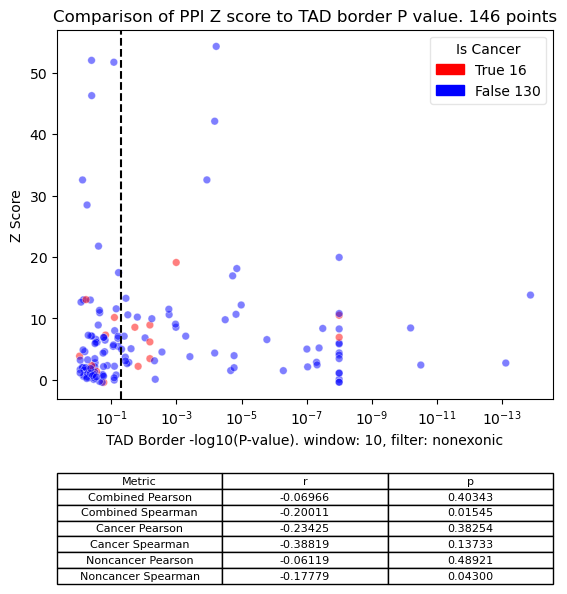


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        30
pval_border     30
pval_outside    30
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.490000e+02  179.000000
mean   2.093006e-01    6.667049
std    2.670042e-01    9.793396
min    6.846634e-12   -0.4690

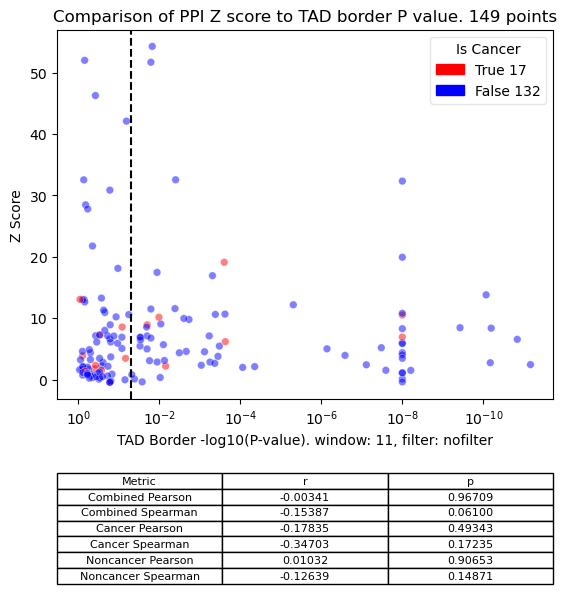


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        10
pval_border     10
pval_outside    10
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.190000e+02  129.000000
mean   1.086353e-01    8.228020
std    1.285988e-01   10.057576
min    9.760802e-12   -0.254518
25%    

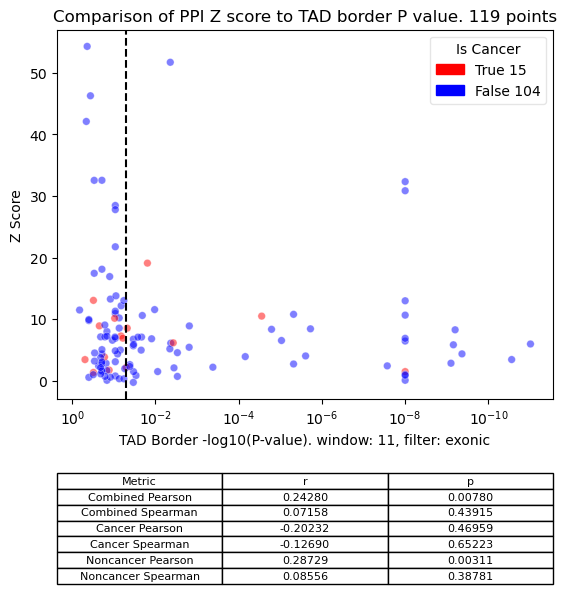


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        34
pval_border     34
pval_outside    34
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.370000e+02  171.000000
mean   1.838804e-01    6.752572
std    2.440233e-01    9.754975
min    3.951006e-14   -0.4690

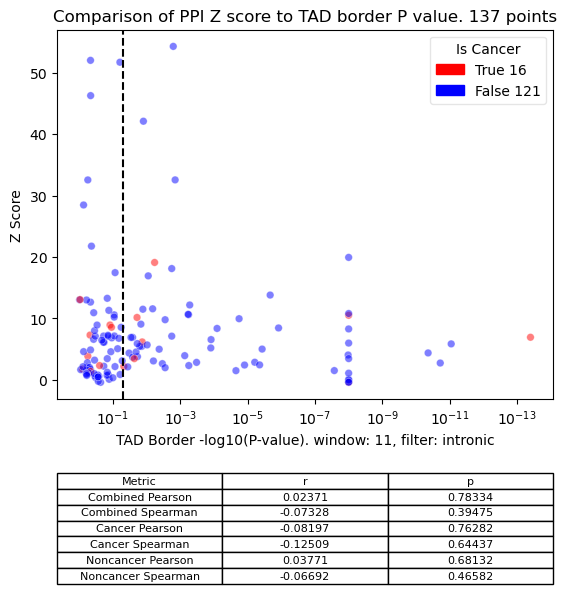


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        19
pval_border     19
pval_outside    19
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.330000e+02  152.000000
mean   3.456351e-01    6.980600
std    2.980132e-01    9.759849
min    6.782276e-11   -0.469036
25%    

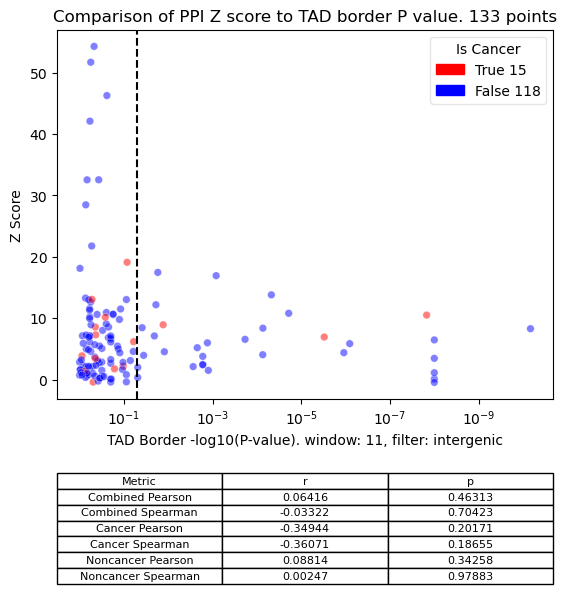


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        33
pval_border     33
pval_outside    33
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.440000e+02  177.000000
mean   2.329230e-01    6.556763
std    2.847571e-01    9.645065
min    1.040348e-12   -0.4690

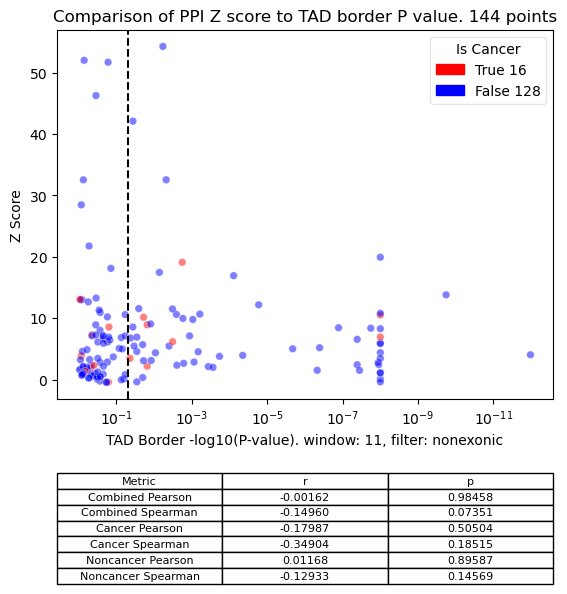


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        29
pval_border     29
pval_outside    29
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.500000e+02  179.000000
mean   2.234068e-01    6.667049
std    2.603657e-01    9.793396
min    1.035825e-12   -0.4690

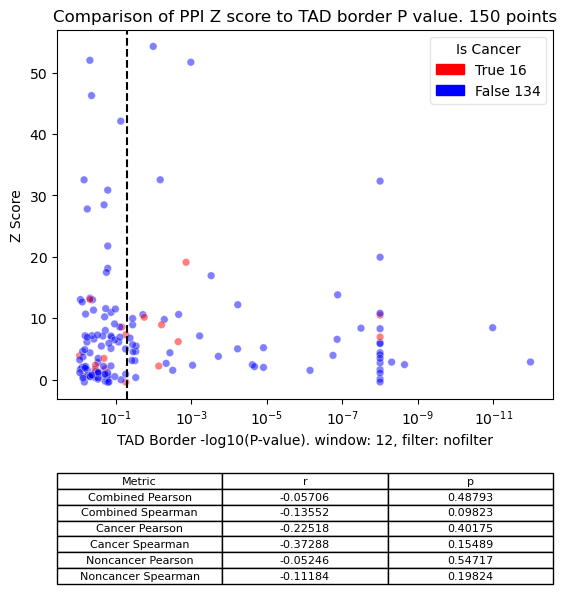


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        18
pval_border     18
pval_outside    18
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.110000e+02  129.000000
mean   9.583875e-02    8.228020
std    1.246179e-01   10.057576
min    9.023893e-14   -0.254518
25%    

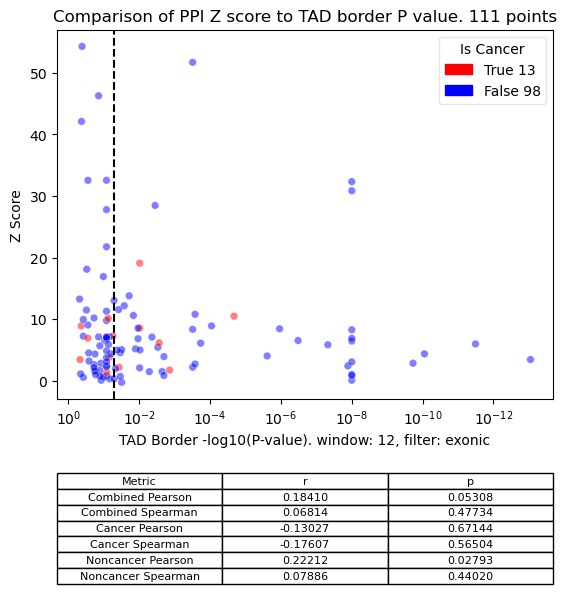


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        35
pval_border     35
pval_outside    35
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.360000e+02  171.000000
mean   2.046693e-01    6.752572
std    2.423563e-01    9.754975
min    1.601351e-13   -0.4690

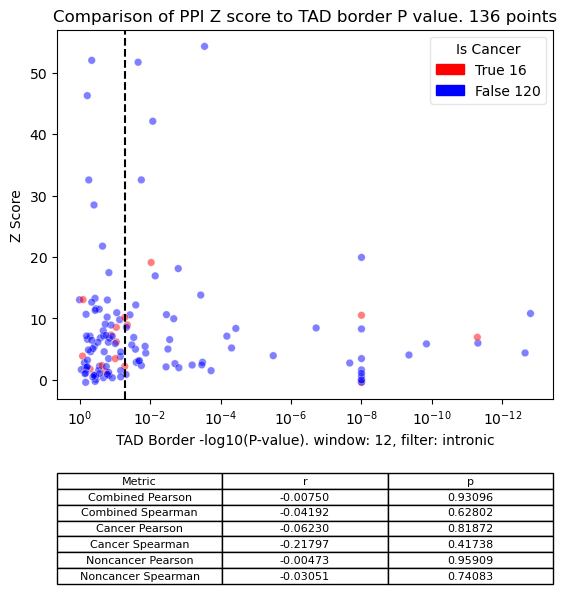


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        19
pval_border     19
pval_outside    19
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.330000e+02  152.000000
mean   3.470552e-01    6.980600
std    2.756523e-01    9.759849
min    2.360100e-14   -0.469036
25%    

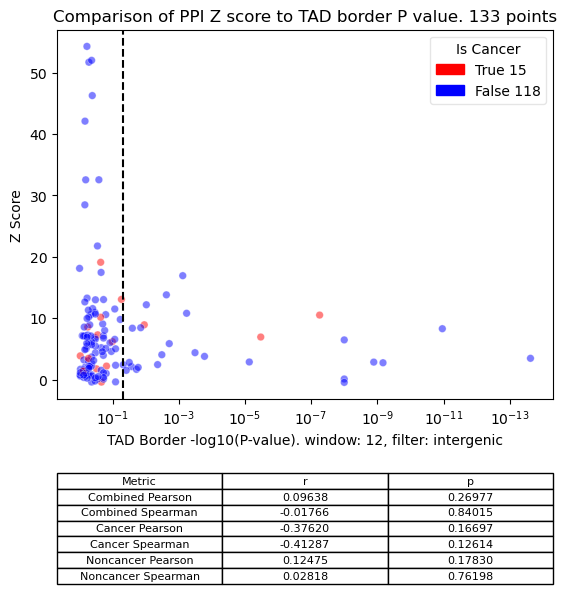


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        32
pval_border     32
pval_outside    32
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.450000e+02  177.000000
mean   2.505943e-01    6.556763
std    2.672219e-01    9.645065
min    6.262866e-13   -0.4690

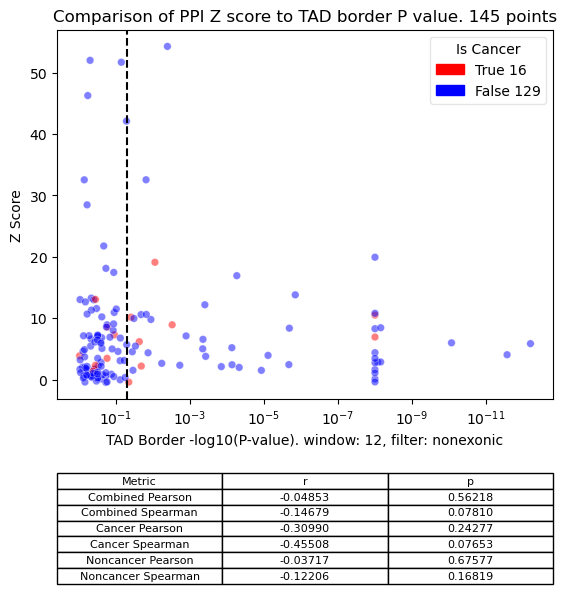


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        33
pval_border     33
pval_outside    33
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.460000e+02  179.000000
mean   2.262241e-01    6.667049
std    2.652647e-01    9.793396
min    5.995204e-15   -0.4690

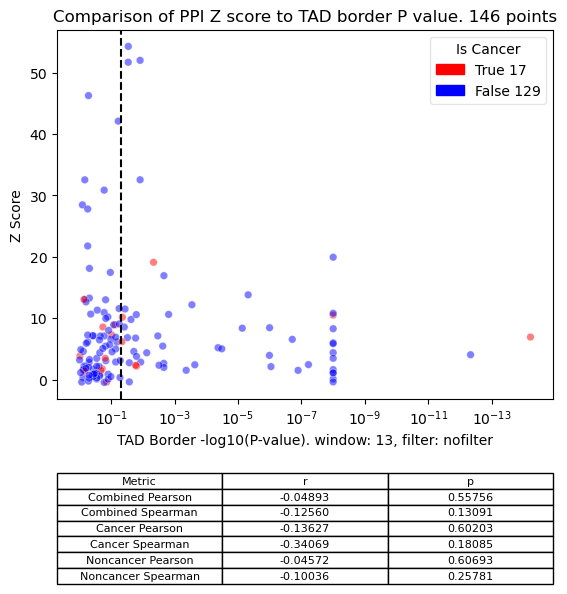


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        15
pval_border     15
pval_outside    15
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.140000e+02  129.000000
mean   1.378147e-01    8.228020
std    1.576314e-01   10.057576
min    4.441632e-13   -0.254518
25%    

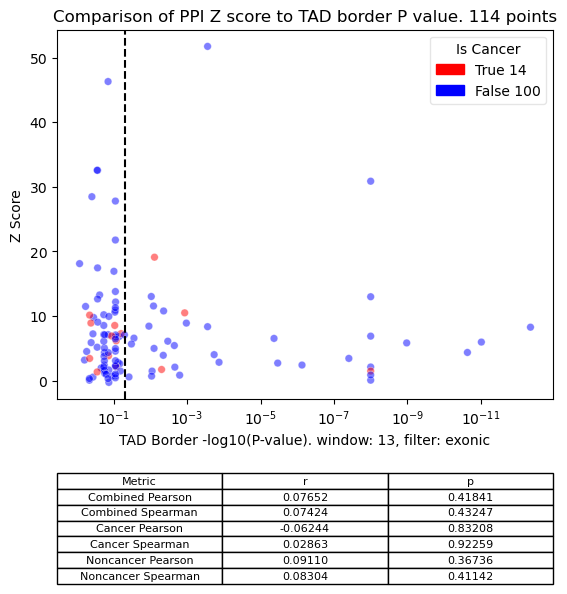


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        37
pval_border     37
pval_outside    37
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.340000e+02  171.000000
mean   2.030287e-01    6.752572
std    2.436618e-01    9.754975
min    2.037586e-15   -0.4690

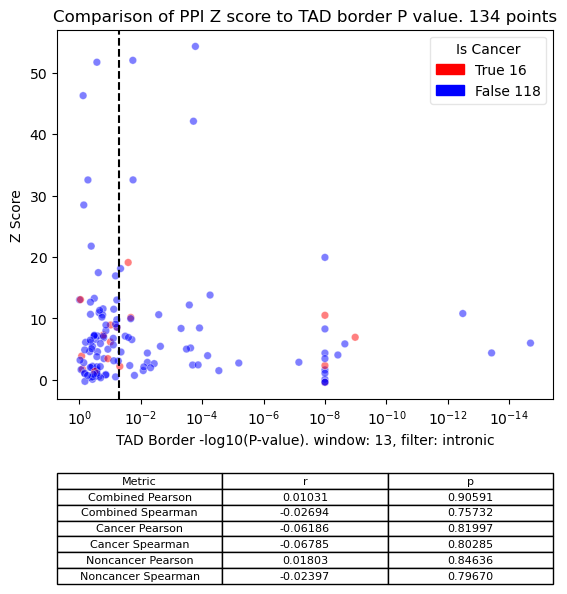


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        20
pval_border     20
pval_outside    20
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.320000e+02  152.000000
mean   3.654867e-01    6.980600
std    3.044235e-01    9.759849
min    8.184336e-15   -0.469036
25%    

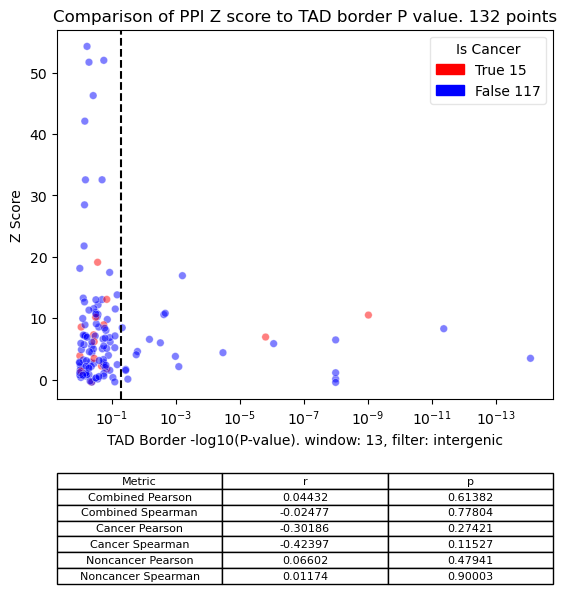


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        34
pval_border     34
pval_outside    34
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.430000e+02  177.000000
mean   2.558053e-01    6.556763
std    2.781676e-01    9.645065
min    2.311876e-15   -0.4690

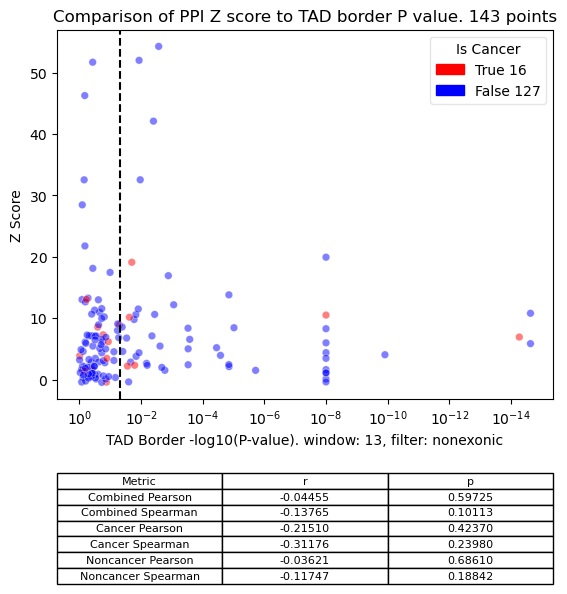


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        31
pval_border     31
pval_outside    31
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.480000e+02  179.000000
mean   2.386598e-01    6.667049
std    2.776713e-01    9.793396
min    2.471134e-13   -0.4690

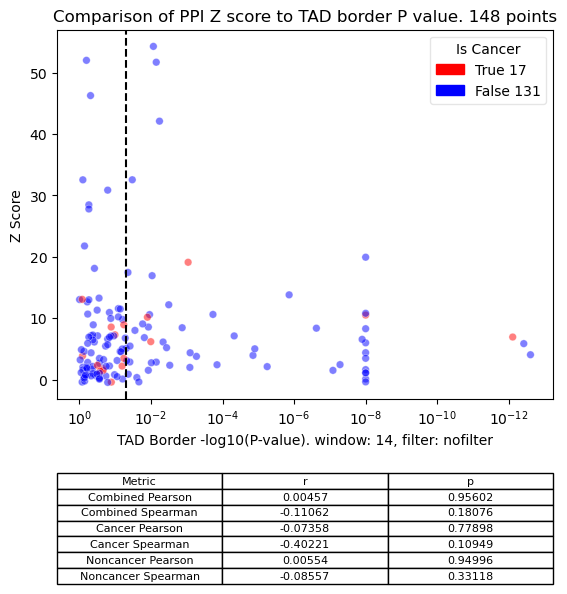


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        17
pval_border     17
pval_outside    17
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.120000e+02  129.000000
mean   1.234515e-01    8.228020
std    1.608111e-01   10.057576
min    5.024319e-11   -0.254518
25%    

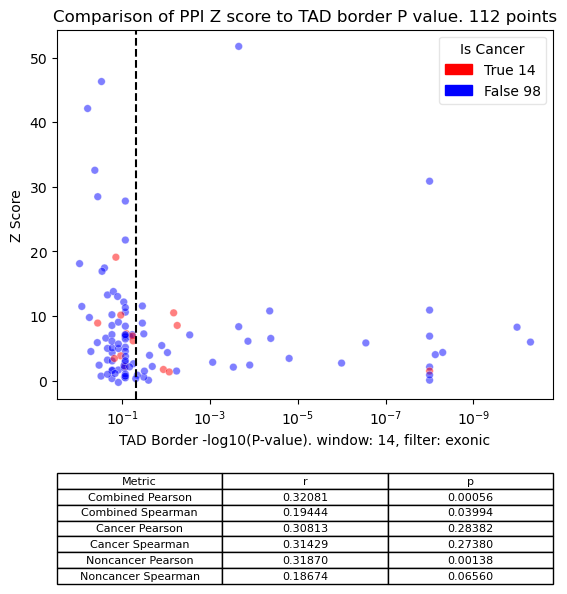


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        36
pval_border     36
pval_outside    36
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.350000e+02  171.000000
mean   2.162618e-01    6.752572
std    2.533672e-01    9.754975
min    6.872281e-14   -0.4690

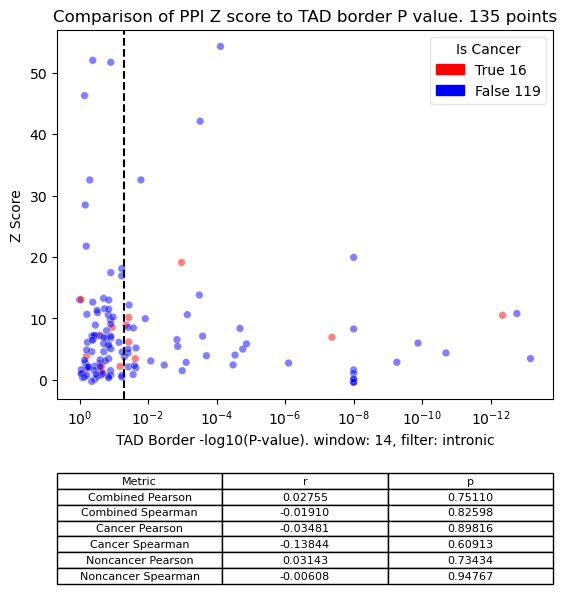


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        21
pval_border     21
pval_outside    21
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.310000e+02  152.000000
mean   3.443330e-01    6.980600
std    2.970909e-01    9.759849
min    5.038372e-13   -0.469036
25%    

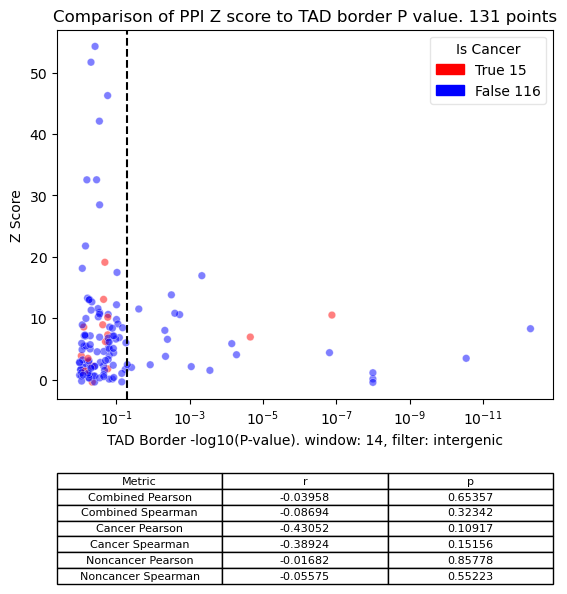


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        34
pval_border     34
pval_outside    34
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.430000e+02  177.000000
mean   2.607331e-01    6.556763
std    2.854968e-01    9.645065
min    2.492630e-15   -0.4690

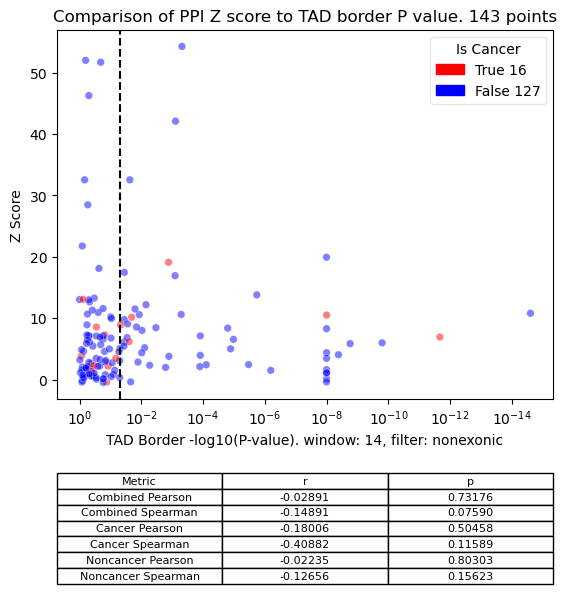


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        31
pval_border     31
pval_outside    31
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.480000e+02  179.000000
mean   2.383116e-01    6.667049
std    2.573976e-01    9.793396
min    2.823139e-15   -0.4690

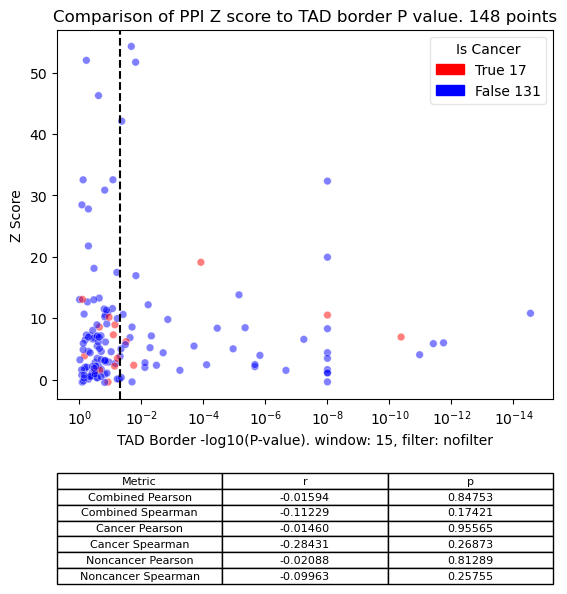


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        16
pval_border     16
pval_outside    16
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.130000e+02  129.000000
mean   1.377939e-01    8.228020
std    1.892962e-01   10.057576
min    4.437530e-10   -0.254518
25%    

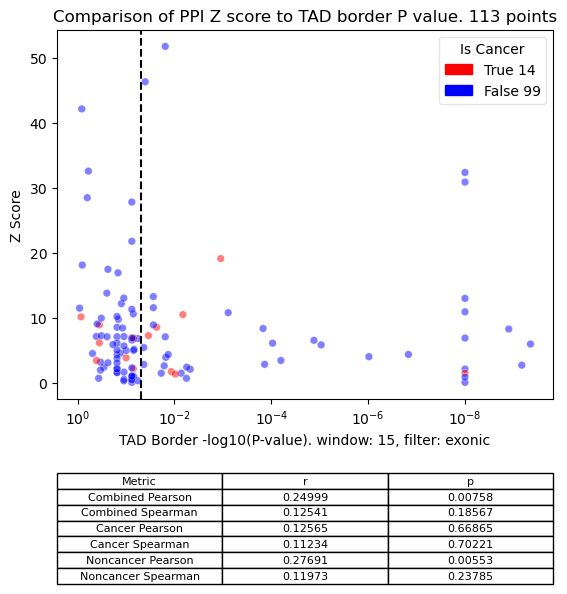


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        38
pval_border     38
pval_outside    38
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.330000e+02  171.000000
mean   2.166272e-01    6.752572
std    2.324084e-01    9.754975
min    3.159781e-12   -0.4690

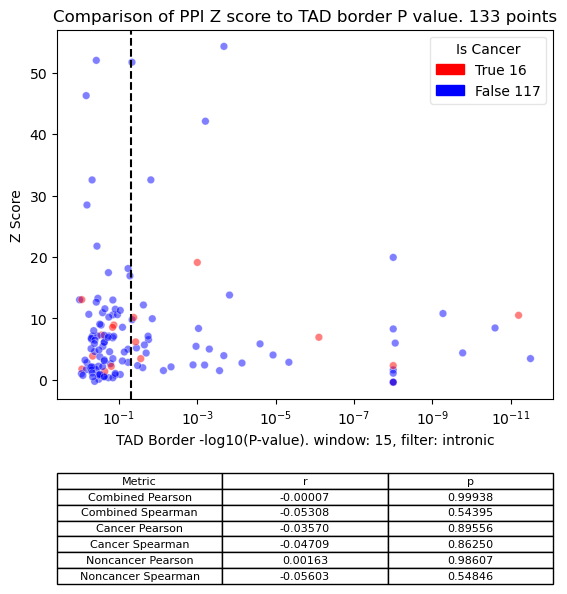


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        21
pval_border     21
pval_outside    21
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.310000e+02  152.000000
mean   3.725552e-01    6.980600
std    2.951455e-01    9.759849
min    1.327162e-11   -0.469036
25%    

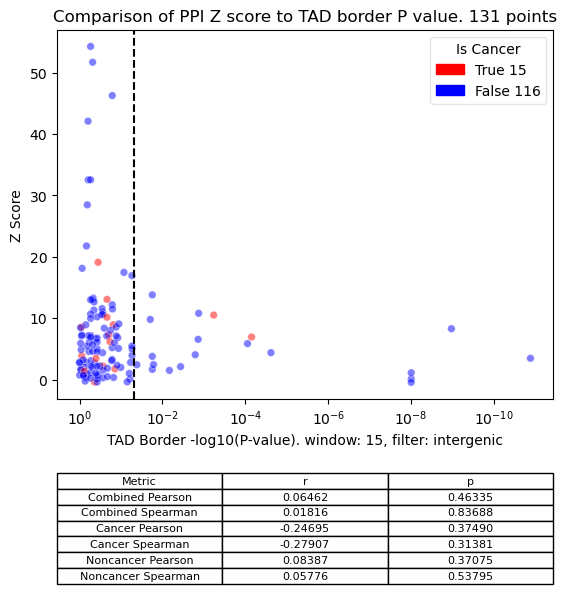


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        35
pval_border     35
pval_outside    35
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.420000e+02  177.000000
mean   2.672526e-01    6.556763
std    2.673943e-01    9.645065
min    2.553513e-15   -0.4690

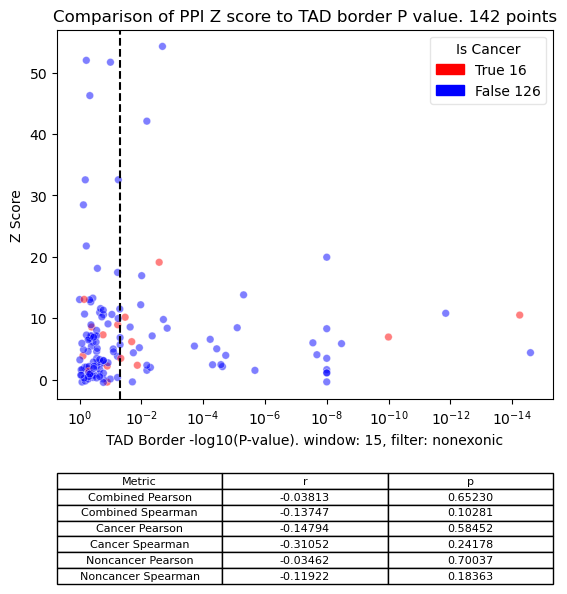


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        30
pval_border     30
pval_outside    30
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.490000e+02  179.000000
mean   2.498014e-01    6.667049
std    2.629851e-01    9.793396
min    2.459565e-13   -0.4690

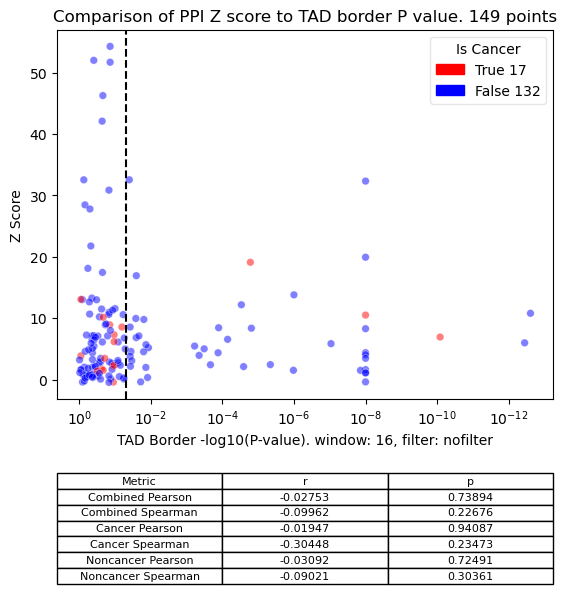


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        18
pval_border     18
pval_outside    18
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.110000e+02  129.000000
mean   1.631219e-01    8.228020
std    1.975980e-01   10.057576
min    1.000000e-08   -0.254518
25%    

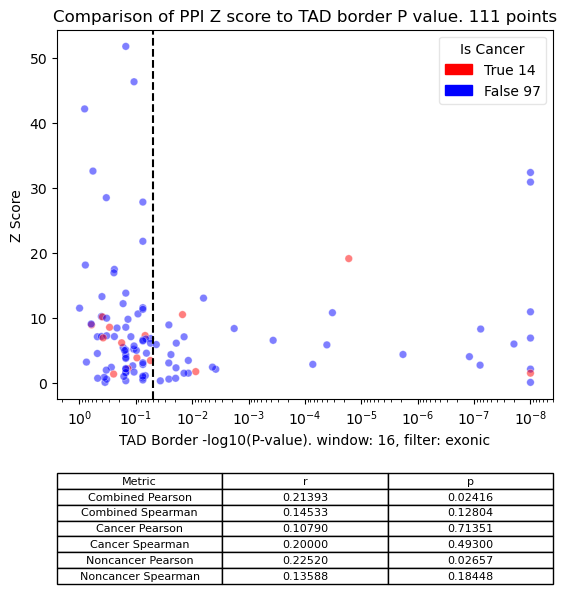


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        38
pval_border     38
pval_outside    38
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.330000e+02  171.000000
mean   2.208451e-01    6.752572
std    2.312368e-01    9.754975
min    4.439837e-12   -0.4690

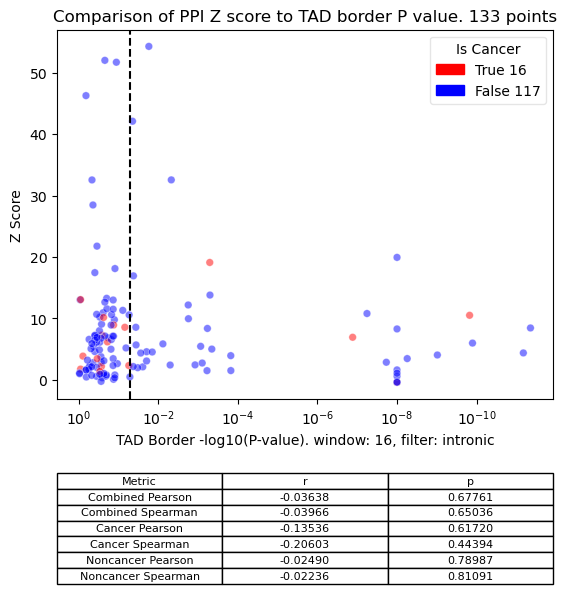


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        22
pval_border     22
pval_outside    22
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.300000e+02  152.000000
mean   3.694668e-01    6.980600
std    3.067152e-01    9.759849
min    1.302759e-10   -0.469036
25%    

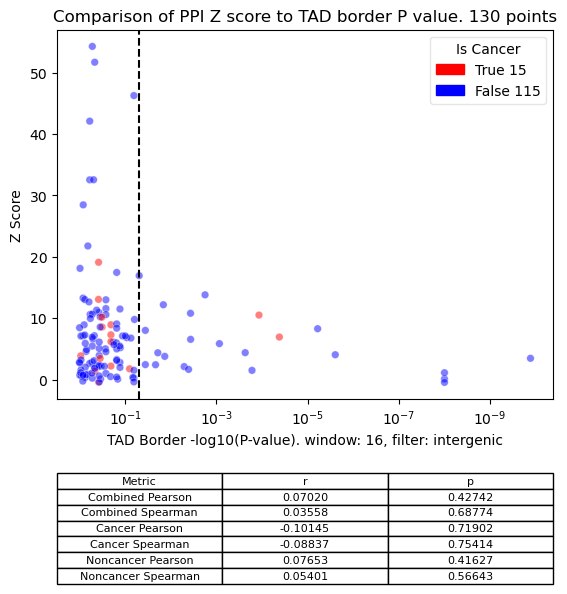


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        33
pval_border     33
pval_outside    33
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.440000e+02  177.000000
mean   2.746392e-01    6.556763
std    2.748766e-01    9.645065
min    2.542411e-15   -0.4690

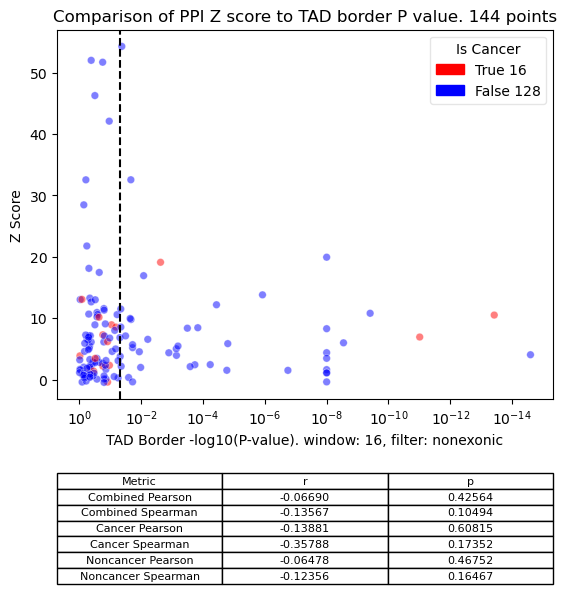


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        34
pval_border     34
pval_outside    34
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.450000e+02  179.000000
mean   2.765928e-01    6.667049
std    2.697375e-01    9.793396
min    1.837974e-13   -0.4690

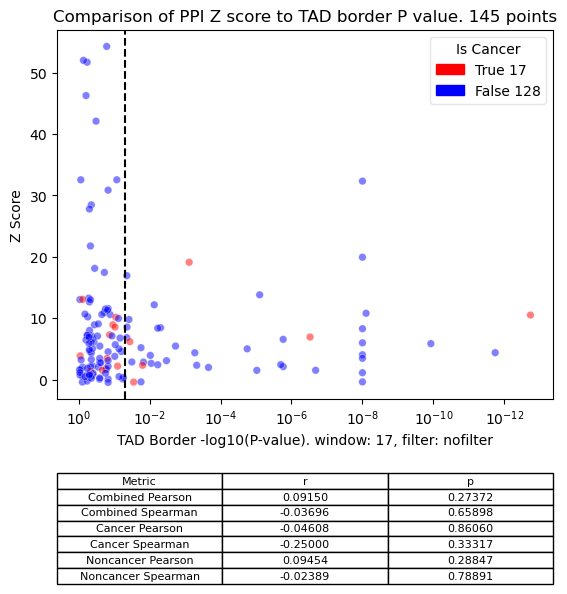


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        21
pval_border     21
pval_outside    21
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.080000e+02  129.000000
mean   1.811464e-01    8.228020
std    2.161117e-01   10.057576
min    3.909243e-10   -0.254518
25%    

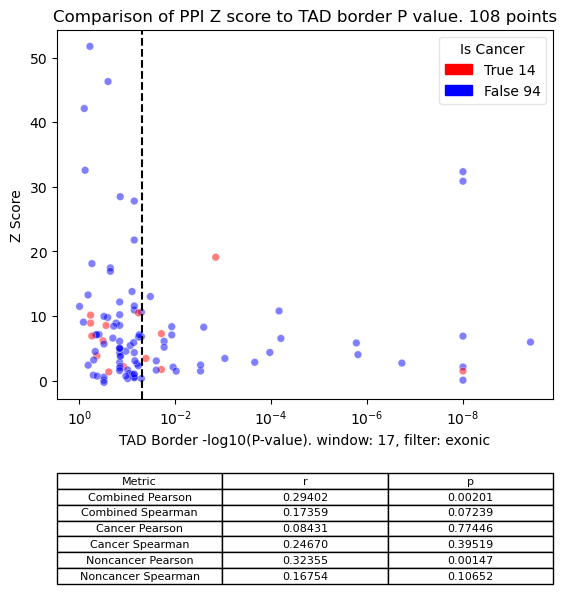


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        40
pval_border     40
pval_outside    40
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.310000e+02  171.000000
mean   2.510456e-01    6.752572
std    2.568938e-01    9.754975
min    3.017788e-15   -0.4690

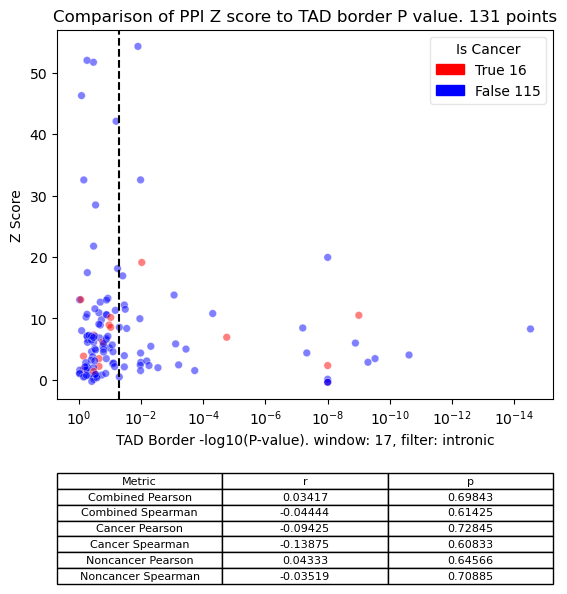


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        24
pval_border     24
pval_outside    24
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.280000e+02  152.000000
mean   3.726855e-01    6.980600
std    3.022598e-01    9.759849
min    2.023143e-10   -0.469036
25%    

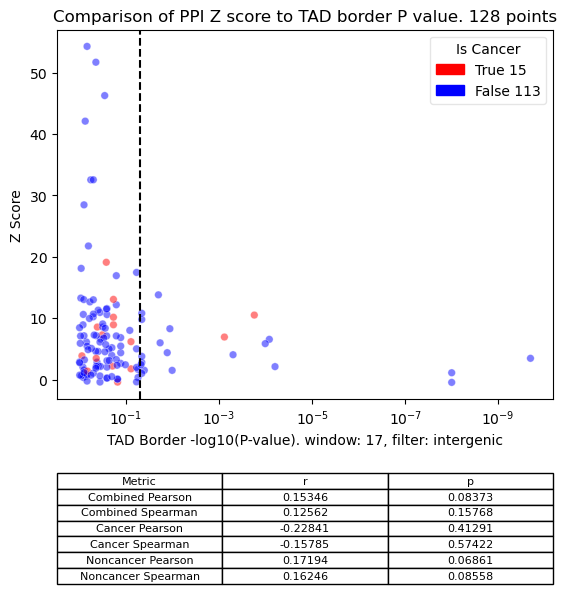


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        37
pval_border     37
pval_outside    37
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.400000e+02  177.000000
mean   2.968559e-01    6.556763
std    2.816717e-01    9.645065
min    5.600458e-15   -0.4690

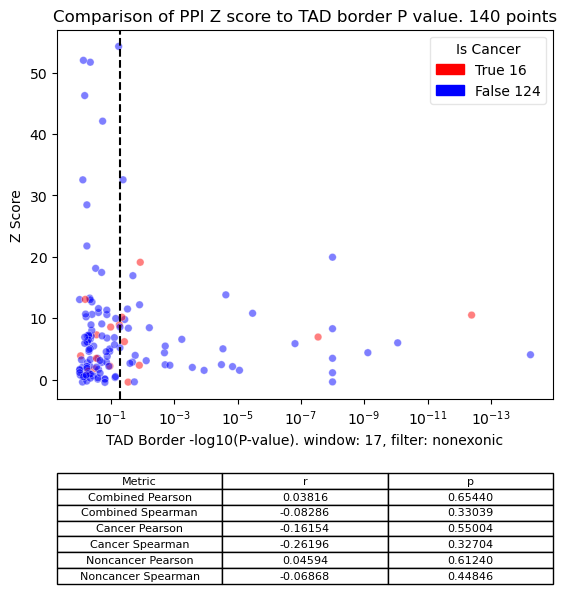


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        34
pval_border     34
pval_outside    34
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.450000e+02  179.000000
mean   2.933436e-01    6.667049
std    2.790570e-01    9.793396
min    3.648034e-13   -0.4690

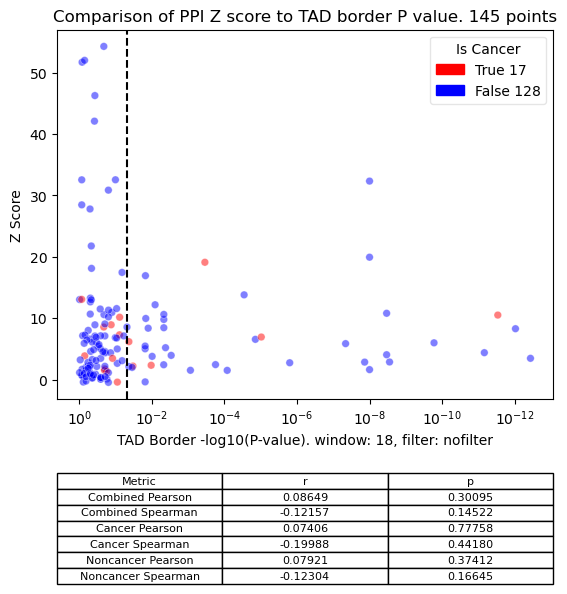


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        25
pval_border     25
pval_outside    25
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.040000e+02  129.000000
mean   1.869473e-01    8.228020
std    2.025644e-01   10.057576
min    1.000000e-08   -0.254518
25%    

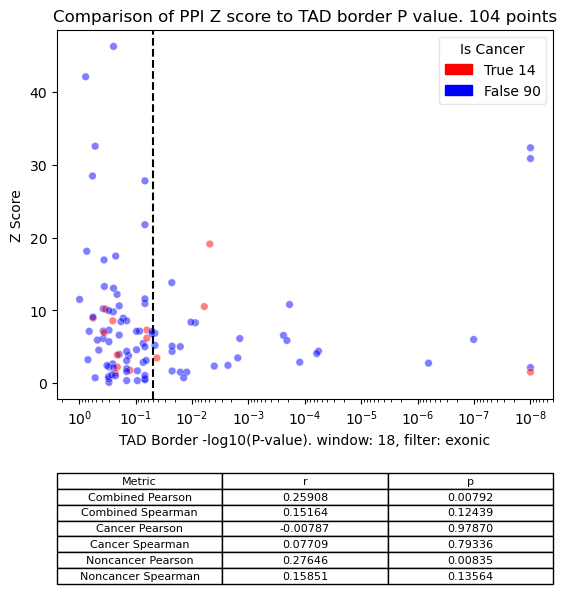


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        41
pval_border     41
pval_outside    41
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.300000e+02  171.000000
mean   2.499179e-01    6.752572
std    2.447249e-01    9.754975
min    1.390877e-10   -0.4690

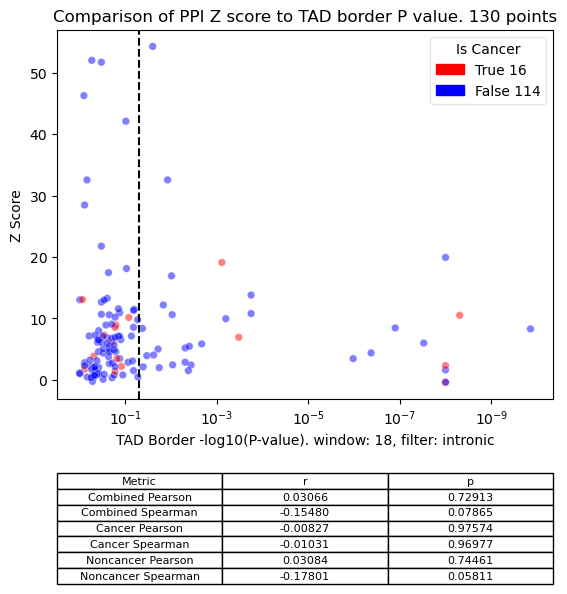


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        23
pval_border     23
pval_outside    23
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.290000e+02  152.000000
mean   3.923947e-01    6.980600
std    2.830733e-01    9.759849
min    1.453663e-10   -0.469036
25%    

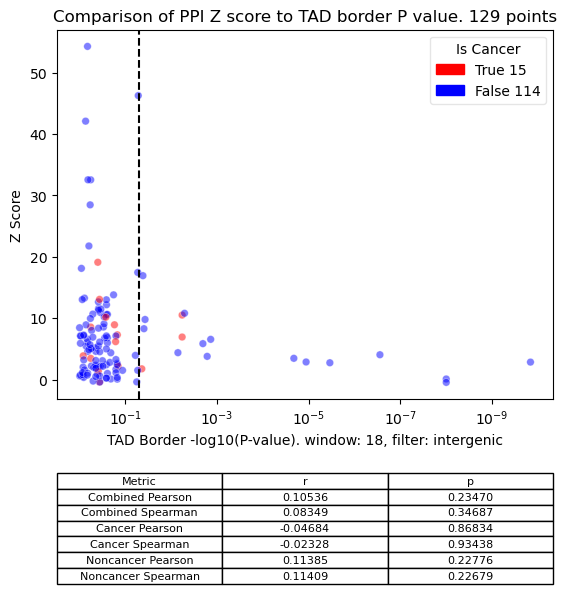


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        37
pval_border     37
pval_outside    37
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.400000e+02  177.000000
mean   3.049976e-01    6.556763
std    2.819758e-01    9.645065
min    2.576862e-11   -0.4690

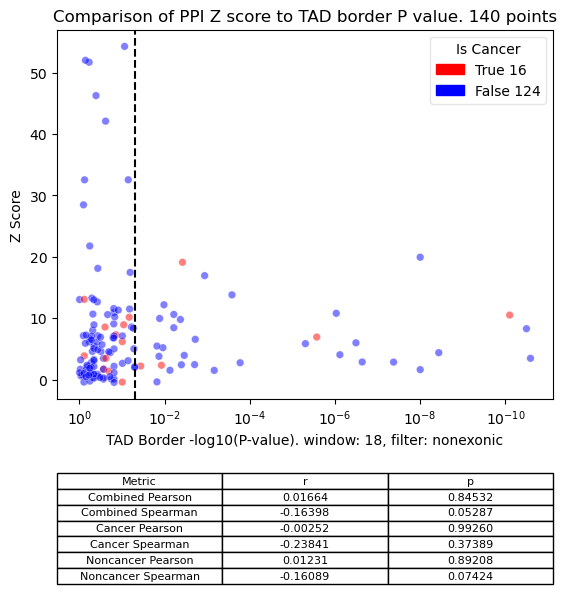


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        33
pval_border     33
pval_outside    33
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.460000e+02  179.000000
mean   2.758070e-01    6.667049
std    2.727951e-01    9.793396
min    5.838885e-14   -0.4690

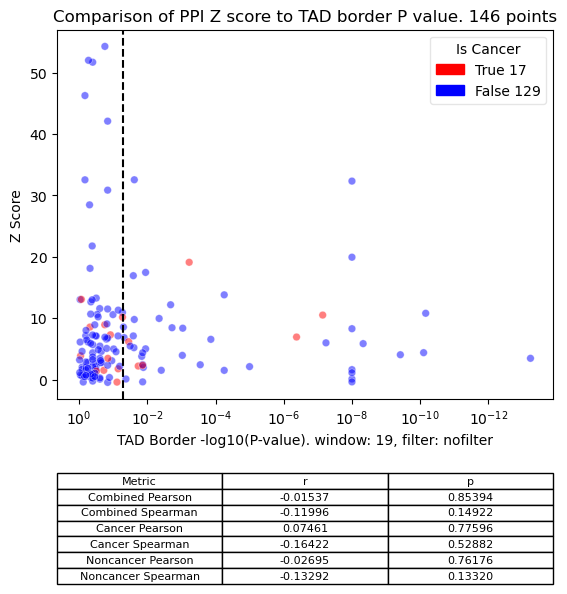


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        29
pval_border     29
pval_outside    29
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.000000e+02  129.000000
mean   1.764785e-01    8.228020
std    1.955014e-01   10.057576
min    1.000000e-08   -0.254518
25%    

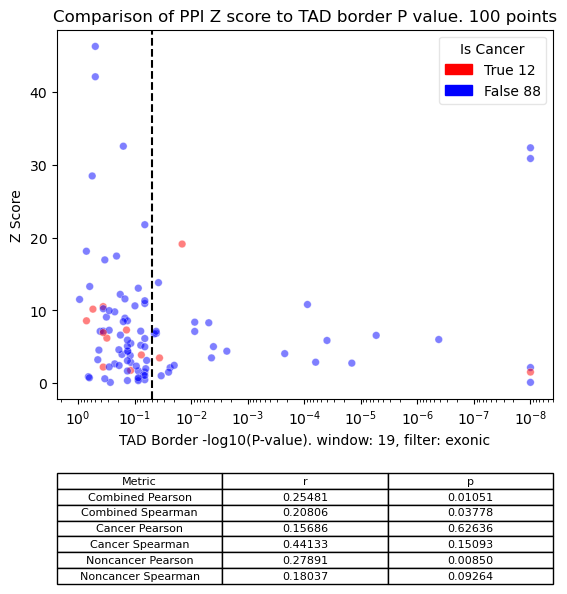


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        39
pval_border     39
pval_outside    39
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.320000e+02  171.000000
mean   2.472052e-01    6.752572
std    2.424087e-01    9.754975
min    1.046202e-09   -0.4690

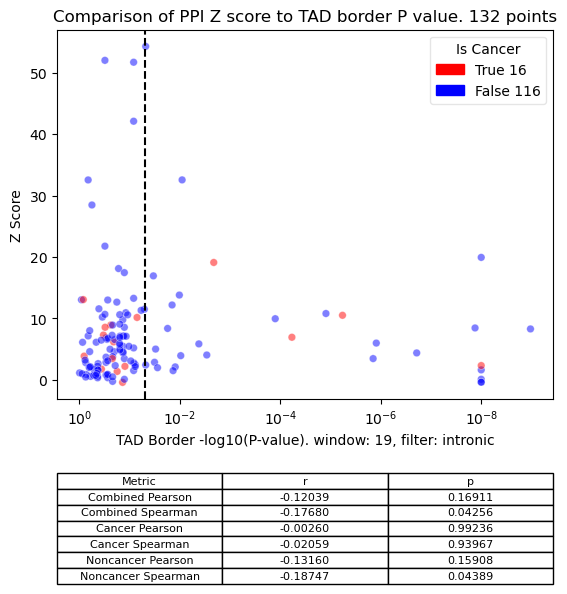


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        22
pval_border     22
pval_outside    22
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.300000e+02  152.000000
mean   3.471921e-01    6.980600
std    2.896183e-01    9.759849
min    1.000000e-08   -0.469036
25%    

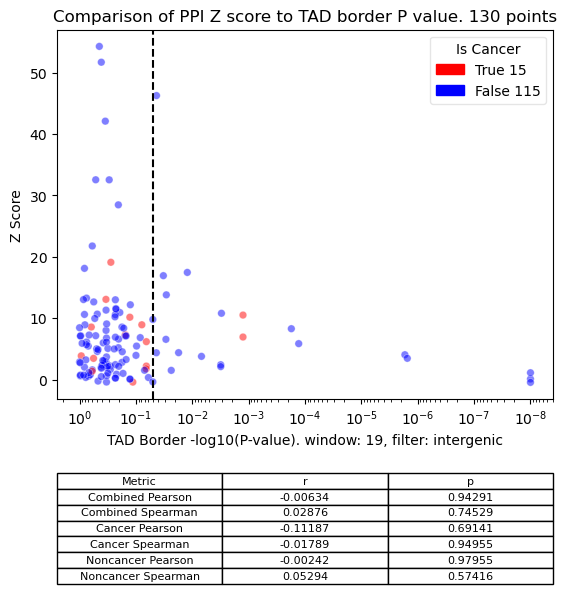


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        35
pval_border     35
pval_outside    35
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.420000e+02  177.000000
mean   2.874996e-01    6.556763
std    2.801948e-01    9.645065
min    1.716576e-13   -0.4690

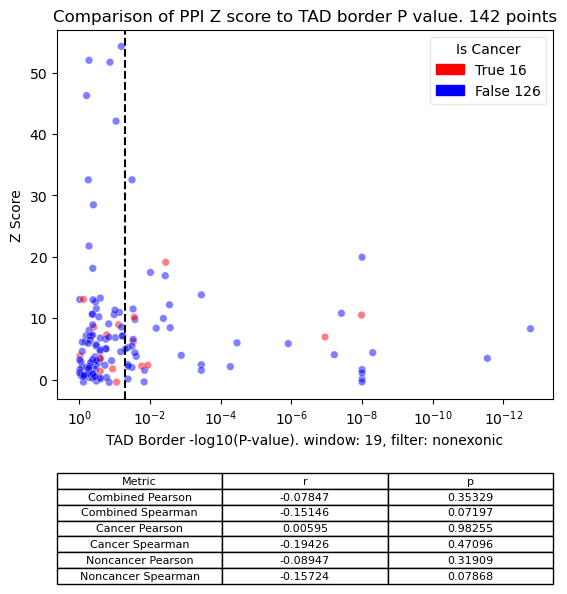


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[81 rows x 3 columns] length: 81
number of null points: diseaseId        0
pval_tad        33
pval_border     33
pval_outside    33
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.460000e+02  179.000000
mean   2.915669e-01    6.667049
std    2.673166e-01    9.793396
min    1.643923e-13   -0.4690

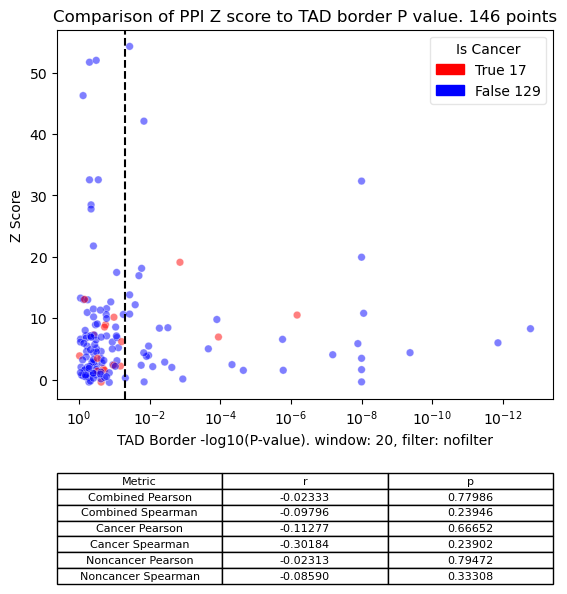


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[131 rows x 3 columns] length: 131
number of null points: diseaseId        0
pval_tad        26
pval_border     26
pval_outside    26
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.030000e+02  129.000000
mean   1.598912e-01    8.228020
std    1.747798e-01   10.057576
min    7.833655e-09   -0.254518
25%    

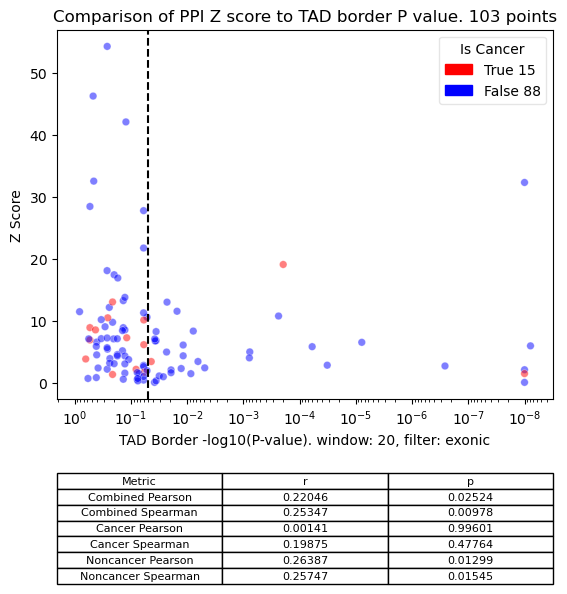


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[89 rows x 3 columns] length: 89
number of null points: diseaseId        0
pval_tad        39
pval_border     39
pval_outside    39
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.320000e+02  171.000000
mean   2.687637e-01    6.752572
std    2.541225e-01    9.754975
min    1.636404e-09   -0.4690

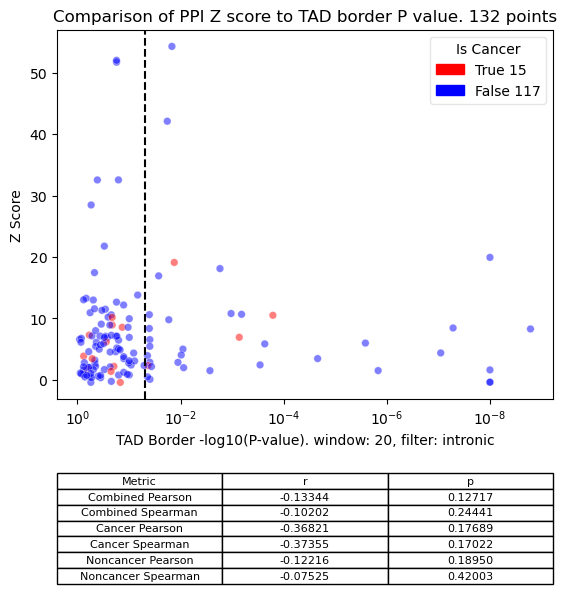


Rows from PPI Network dataset that were NOT included:
         diseaseId   z_score        pvalue
3    MONDO_0005575  2.359995  9.560000e-07
4      EFO_0005512 -0.120418  4.313000e-01
5      EFO_0000222  2.164232  8.800000e-03
8      EFO_1001252  2.060168  0.000000e+00
18     EFO_0009781 -0.077243  4.313000e-01
..             ...       ...           ...
226  MONDO_0002280  0.355661  7.500000e-03
227  MONDO_0013626 -0.491357  1.567000e-01
228    EFO_1000848  0.846713  2.830000e-06
229    EFO_0000536 -0.346804  1.094000e-01
230  MONDO_0003689  0.658076  9.410000e-06

[108 rows x 3 columns] length: 108
number of null points: diseaseId        0
pval_tad        25
pval_border     25
pval_outside    25
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.270000e+02  152.000000
mean   3.733820e-01    6.980600
std    2.845138e-01    9.759849
min    2.883878e-13   -0.469036
25%    

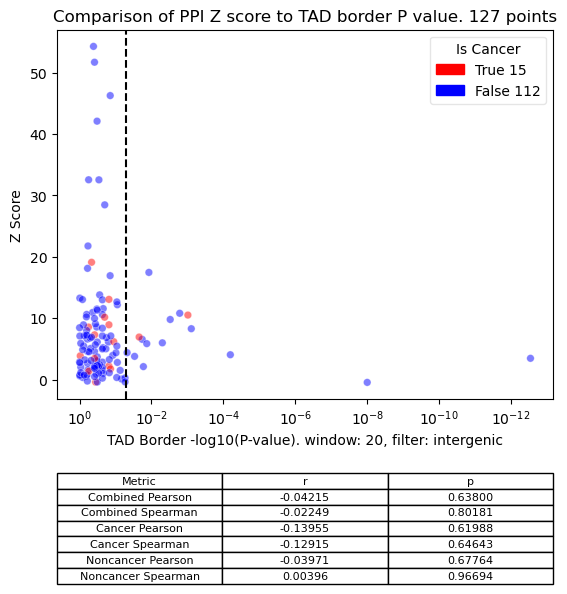


Rows from PPI Network dataset that were NOT included:
         diseaseId    z_score        pvalue
3    MONDO_0005575   2.359995  9.560000e-07
5      EFO_0000222   2.164232  8.800000e-03
22   MONDO_0008903  13.553437  8.280000e-06
23     EFO_0000349   5.875196  9.500000e-03
24     EFO_0002890  13.742369  3.830000e-05
..             ...        ...           ...
226  MONDO_0002280   0.355661  7.500000e-03
227  MONDO_0013626  -0.491357  1.567000e-01
228    EFO_1000848   0.846713  2.830000e-06
229    EFO_0000536  -0.346804  1.094000e-01
230  MONDO_0003689   0.658076  9.410000e-06

[83 rows x 3 columns] length: 83
number of null points: diseaseId        0
pval_tad        36
pval_border     36
pval_outside    36
is_cancer        0
window_size      0
filter           0
z_score          0
pvalue           0
_merge           0
dtype: int64
        pval_border     z_score
count  1.410000e+02  177.000000
mean   3.124806e-01    6.556763
std    2.847604e-01    9.645065
min    1.262657e-12   -0.4690

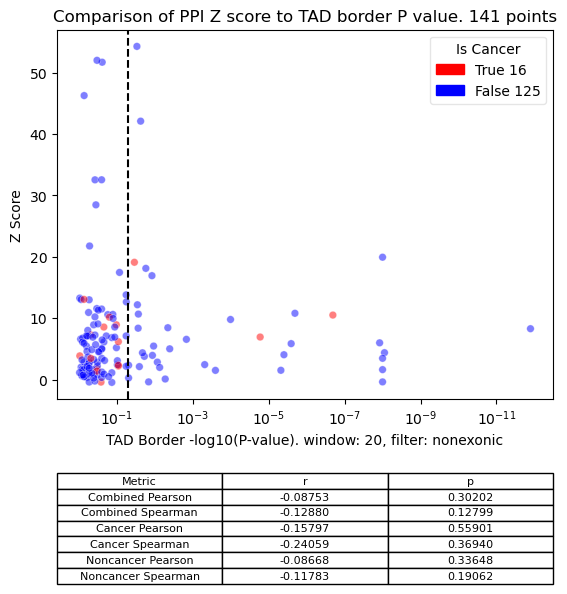

In [40]:
filters = ['nofilter', 'exonic', 'intronic', 'intergenic', 'nonexonic']
for i in range(3, 21):
    for j in filters:
        get_scatterplot(df, i, j, combined, 'combined')

In [12]:
def get_network_scatterplot(df1, type):
    sns.scatterplot(data=df1, x='pvalue', y='z_score', hue='is_cancer', palette={True: 'red', False: 'blue'}, alpha=0.5, s=30)
    plt.ylim(-5, 70)  
    plt.axvline(x=0.05, color='black', linestyle='dashed', label='P = 0.05')
    plt.xscale('log')
    plt.gca().invert_xaxis()
    plt.xlabel('P Value')
    plt.ylabel('Z Score')
    plt.title(f'Comparison of PPI Network Z score to P value. {len(df1)} points')
    
    cancer_data = df1[df1["is_cancer"] == True]
    noncancer_data = df1[df1["is_cancer"] == False]
    legend_items = [
        patches.Patch(color='red', label=f'True {len(cancer_data)}'), 
        patches.Patch(color='blue', label=f'False {len(noncancer_data)}')]
    plt.legend(title='Is Cancer', handles=legend_items, loc='upper left', framealpha = 0.5)
    
    if len(df1) >= 2:
        if len(cancer_data) >= 2 and len(noncancer_data) >= 2:
            stats = {
                "Combined Pearson": pearsonr(df1["pvalue"], df1["z_score"]),
                "Combined Spearman": spearmanr(df1["pvalue"],df1["z_score"]),
                "Cancer Pearson": pearsonr(cancer_data["pvalue"], cancer_data["z_score"]), 
                "Cancer Spearman": spearmanr(cancer_data["pvalue"], cancer_data["z_score"]),
                "Noncancer Pearson": pearsonr(noncancer_data["pvalue"], noncancer_data["z_score"]), 
                "Noncancer Spearman": spearmanr(noncancer_data["pvalue"], noncancer_data["z_score"])
            }
        else:
            stats = {
                "Combined Pearson": pearsonr(df1["pvalue"], df1["z_score"]),
                "Combined Spearman": spearmanr(df1["pvalue"], df1["z_score"])
            }
            
        table_data = [
            ["Metric", "r", "p"]
        ]
        
        for key, value in stats.items():
            table_data.append([key, f"{value[0]:.5f}", f"{value[1]:.5f}"])

        table = plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='bottom', bbox=[0, -0.5, 1, 0.3])
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.scale(1, 1.2)
    
    plt.savefig(f'results_graphs/network_graphs/comparison_{type}.png', dpi=300, bbox_inches='tight')
    plt.show()


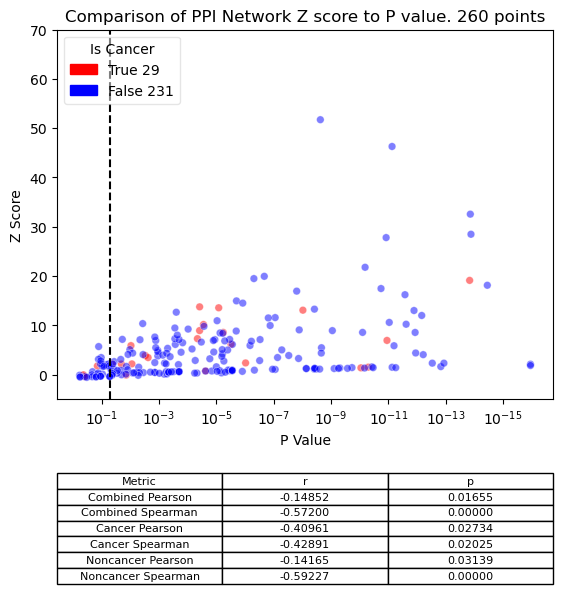

In [13]:
get_network_scatterplot(combined, 'combined')